# Kaggle Machine Learning & Data Science Survey: Exploratory Data Analysis

![image](https://imgur.com/FMYemIW.png)

## Introduction

Exploratory data analysis, or EDA, is an important aspect of data science. It allows us to analyse data sets and summarise them with visuals and findings.

In this project, I'll be analysing a set of data that comes from two Kaggle surveys. The survey respondents are made up of Kaggle users and are working or studying within the tech industry. I'm hoping that by the end of this project I will better understand the relationships that gender, age, and other demographics have on work place related things such as salary and job fields. 

The purpose behind choosing this data set to study is that I believe equality in the workplace is imperative. In order to have a better chance at having equality at work, we must arm ourselves with data to back the inequities so that we can let the data speak for us and continue to analyse progress, or lack thereof, with future data.

## Installing libraries and downloading data

### Installing and importing the libraries

Let's start by installing and importing the libraries that will be used throughout this project.

In [226]:
!pip install numpy pandas jovian opendatasets matplotlib seaborn plotly folium squarify --quiet

In [227]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import opendatasets as od
import os
import pandas as pd
import folium
import squarify as sq
from urllib.request import urlretrieve

### Downloading the data

Next we'll download the data from Kaggle using opendatasets. The data we'll be using is:
* [2021 Kaggle Machine Learning & Data Science Survey](https://www.kaggle.com/competitions/kaggle-survey-2021/data)
* [2022 Kaggle Machine Learning & Data Science Survey](https://www.kaggle.com/competitions/kaggle-survey-2022/data)

The two surveys were conducted by Kaggle via invitations to all Kaggle community members. The surveys were also promoted on the Kaggle website and Twitter account. 

The responses were filtered such that certain responses were excluded if the survey filter decided the responses were “Spam” or "Duplicate". Respondents that spent less than two minutes on the survey and respondents that did not complete more than 15 questions were also excluded.

In [228]:
dataset_url_2021 = 'https://www.kaggle.com/competitions/kaggle-survey-2021/data'
dataset_url_2022 = 'https://www.kaggle.com/competitions/kaggle-survey-2022/data'

In [229]:
od.download(dataset_url_2021)
od.download(dataset_url_2022)

Skipping, found downloaded files in "./kaggle-survey-2021" (use force=True to force download)
Skipping, found downloaded files in "./kaggle-survey-2022" (use force=True to force download)


In [230]:
data_dir_2021 = 'kaggle-survey-2021'
data_dir_2022 = 'kaggle-survey-2022'

print(os.listdir(data_dir_2021))
os.listdir(data_dir_2022)

['kaggle_survey_2021_responses.csv', 'supplementary_data']


['kaggle_survey_2022_responses.csv', 'Supplementary Data']

## Creating a data frame, cleaning, and preprocessing the data

### Upload the data into data frames

We'll preselect the columns that we want to use in order to optimise memory usage.

In [231]:
selected_columns_2021 =[
    'Q1',
    'Q2',
    'Q3',
    'Q4',
    'Q5',
    'Q20',
    'Q25'
]

selected_columns_2022 =[
    'Q2',
    'Q3',
    'Q4',
    'Q8',
    'Q23',
    'Q24',
    'Q29'
]

In [232]:
survey_2021_df = pd.read_csv(data_dir_2021 + '/kaggle_survey_2021_responses.csv', 
                             usecols=selected_columns_2021, low_memory=False)
survey_2022_df = pd.read_csv(data_dir_2022 + '/kaggle_survey_2022_responses.csv', 
                             usecols=selected_columns_2022, low_memory=False)

Let's have a look at the two data frames.

In [233]:
survey_2021_df.head(5)

,Q1,Q2,Q3,Q4,Q5,Q20,Q25
0,What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,In what industry is your current employer/cont...,What is your current yearly compensation (appr...
1,50-54,Man,India,Bachelor’s degree,Other,Manufacturing/Fabrication,"25,000-29,999"
2,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,Manufacturing/Fabrication,"60,000-69,999"
3,22-24,Man,Pakistan,Master’s degree,Software Engineer,Academics/Education,$0-999
4,45-49,Man,Mexico,Doctoral degree,Research Scientist,Academics/Education,"30,000-39,999"


In [234]:
survey_2022_df.head(5)

,Q2,Q3,Q4,Q8,Q23,Q24,Q29
0,What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,In what industry is your current employer/cont...,What is your current yearly compensation (appr...
1,30-34,Man,India,NaN,NaN,NaN,NaN
2,30-34,Man,Algeria,Master’s degree,NaN,NaN,NaN
3,18-21,Man,Egypt,Bachelor’s degree,NaN,NaN,NaN
4,55-59,Man,France,Some college/university study without earning ...,Data Scientist,Online Service/Internet-based Services,"25,000-29,999"


### Cleaning the data

Both data frames have the survey questions in the first row. This is going to make processing the data more difficult so we'll extract these into a separate data frame so that we can reference them later on. The survey questions are identical so we only need to save one data frame with questions.

In [235]:
questions = survey_2021_df.iloc[0]

questions[0]

'What is your age (# years)?'

In [236]:
survey_2021_df = survey_2021_df.drop(survey_2021_df.index[0])
survey_2022_df = survey_2022_df.drop(survey_2022_df.index[0])

We'll also rename the column names so that they're easier to understand and use at a glance.

In [237]:
survey_2021_df = survey_2021_df.rename(columns={'Q1': 'Age', 
                                                'Q2': 'Gender', 
                                                'Q3': 'Country', 
                                                'Q4': 'Education', 
                                                'Q5': 'Role', 
                                                'Q20': 'Field', 
                                                'Q25': 'Salary'})

survey_2022_df = survey_2022_df.rename(columns={'Q2': 'Age', 
                                                'Q3': 'Gender', 
                                                'Q4': 'Country', 
                                                'Q8': 'Education', 
                                                'Q23': 'Role', 
                                                'Q24': 'Field', 
                                                'Q29': 'Salary'})

We're now going to merge the data into a single data frame for easier data processing. For this project, we will not be considering the date of being surveyed, whether in 2021 or 2022, as a factor that we're interested in exploring.

In [238]:
merged_df = pd.merge(survey_2021_df, survey_2022_df, how='outer', on=["Age","Gender", "Country", "Education", "Role", "Field", "Salary"])

We're going to allow the NaN values to be 0 since they are all categorical values.

In [239]:
merged_df

,Age,Gender,Country,Education,Role,Field,Salary
0,50-54,Man,India,Bachelor’s degree,Other,Manufacturing/Fabrication,"25,000-29,999"
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,Manufacturing/Fabrication,"60,000-69,999"
2,22-24,Man,Pakistan,Master’s degree,Software Engineer,Academics/Education,$0-999
3,45-49,Man,Mexico,Doctoral degree,Research Scientist,Academics/Education,"30,000-39,999"
4,45-49,Man,India,Doctoral degree,Other,Academics/Education,"30,000-39,999"
...,...,...,...,...,...,...,...
67615,40-44,Man,United States of America,Master’s degree,Data Architect,Accounting/Finance,"100,000-124,999"
67616,55-59,Man,Ukraine,Some college/university study without earning ...,NaN,NaN,NaN
67617,35-39,Man,India,Master’s degree,Data Scientist,Broadcasting/Communications,"2,000-2,999"
67618,25-29,Man,Turkey,Master’s degree,Engineer (non-software),Energy/Mining,"25,000-29,999"


## Understanding the survey demographics by looking at column wise data

We're going to look at the spread of data for each column so that we have a better understanding of the survey demographics. This will be helpful information for us when drawing conclusions later on.

### Basic information

We'll start by looking at the basic information about the data frame.

In [240]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67620 entries, 0 to 67619
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Age        67620 non-null  object
 1   Gender     67620 non-null  object
 2   Country    67620 non-null  object
 3   Education  67021 non-null  object
 4   Role       54253 non-null  object
 5   Field      25462 non-null  object
 6   Salary     23540 non-null  object
dtypes: object(7)
memory usage: 4.1+ MB


As you can see, many people did not report their field of work, their company size, and their salary. 

Interestingly these questions were much later on in the survey so respondents could have lost interest and therefore not responded to these questions or felt that they were too personal. 

In [241]:
merged_df.describe()

,Age,Gender,Country,Education,Role,Field,Salary
count,67620,67620,67620,67021,54253,25462,23540
unique,11,5,68,7,23,18,26
top,22-24,Man,India,Bachelor’s degree,Currently not employed,Computers/Technology,$0-999
freq,17856,55146,33695,28667,21028,6619,4600


All of the data are objects, or categorical data, so the .describe() function references the value counts of each possible response.

### Looking at the Age column

We'll start by looking at the spread of data in the Age column. Let's remind ourselves of the survey question that was asked.

In [242]:
questions[0]

'What is your age (# years)?'

We can create a function in order to find the percentage of responses for each possible response. 

In [243]:
def percentage_range_answers(x):
    df = merged_df.groupby(x).size()
    num = merged_df[x][0:].value_counts()
    y = num / df.sum() *100
    return(y)

In [244]:
age_df = percentage_range_answers('Age')
age_df = age_df.reindex(index = ['18-21', '22-24', '25-29', '30-34', '35-39', '40-44', '45-49',
                                 '50-54', '55-59', '60-69', '70+'])
age_df

18-21    14.547471
22-24    26.406389
25-29    25.053239
30-34    10.627033
35-39     7.343981
40-44     5.677314
45-49     3.861284
50-54     2.766933
55-59     1.743567
60-69     1.606034
70+       0.366755
Name: Age, dtype: float64

Let's visualise the spread of ages of the survey respondents.

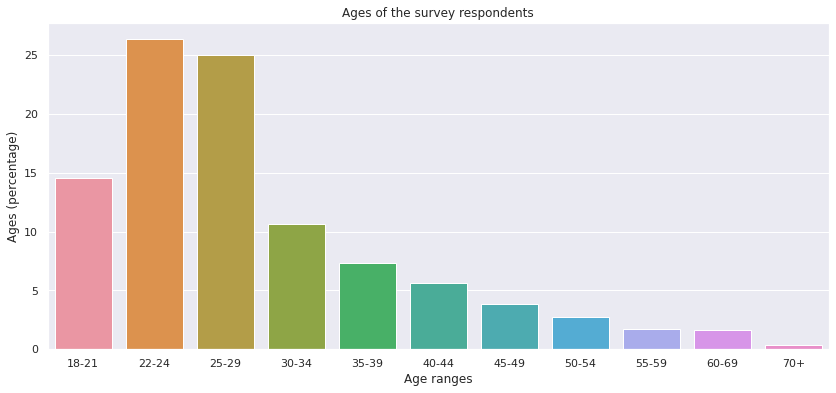

In [245]:
plt.figure(figsize=(14,6))
plt.title("Ages of the survey respondents")
plt.xlabel("Age ranges")
sns.barplot(x=age_df.index, y=age_df)
plt.ylabel("Ages (percentage)");

It seems that the most common age range of the respondents is 22 - 24, closely followed by 25 - 29 years old. 

### Looking at the Gender column

Now we'll look at the spread of data in the Gender column. Let's remind ourselves of the survey question that was asked.

In [246]:
questions[1]

'What is your gender? - Selected Choice'

In [247]:
gender_counts = merged_df.Gender.value_counts()
gender_count = gender_counts[['Man', 'Woman', 'Nonbinary']]
gender_count

Man          55146
Woman        11546
Nonbinary      165
Name: Gender, dtype: int64

In [248]:
percent_women = round(gender_count.Woman / len(merged_df),2)*100
percent_man = round(gender_count.Man / len(merged_df), 2)*100
percent_non_binary = round(gender_count.Nonbinary / len(merged_df), 3)*100

print("The respondents are {}% men, {}% women, and {}% non-binary".format(percent_man, percent_women, percent_non_binary))

The respondents are 82.0% men, 17.0% women, and 0.2% non-binary


Let's visualise the gender of respondents. We won't include "Prefer not to say" and "Prefer to self-describe" for the purpose of this project.

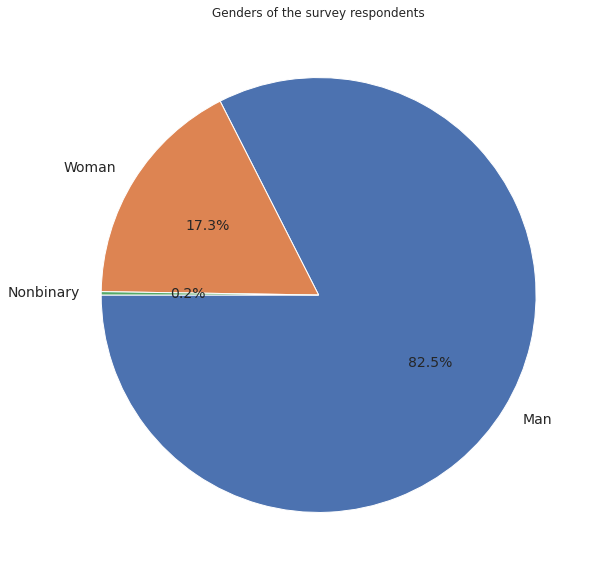

In [249]:
plt.figure(figsize=(14,10))
plt.title("Genders of the survey respondents")
plt.pie(gender_count, labels=gender_count.index, textprops={'fontsize': 14}, autopct='%1.1f%%', startangle=180);

As you can see, the large majority of the respondents to the surveys were men. This [2018 study](https://www.burtchworks.com/wp-content/uploads/2018/05/Burtch-Works-Study_DS-2018.pdf) suggests that only 15% of data scientists are female, so our gender spread shouldn't be too surprising.

### Looking at the Country column

Now we'll look at the spread of data in the Country column. Let's remind ourselves of the survey question that was asked.

In [250]:
questions[2]

'In which country do you currently reside?'

In [251]:
country_count = merged_df.Country.value_counts()
country_count

India                       33695
United States of America     5662
Other                        2696
Nigeria                      1657
Brazil                       1578
                            ...  
Denmark                        48
Uganda                         47
Kazakhstan                     45
Norway                         45
Iraq                           43
Name: Country, Length: 68, dtype: int64

Here are the top 10 countries that respondents are from. There is a hugely disproportionate amount of responses from India which we will keep in mind while drawing conclusions.

In [252]:
country_count_top_10 = merged_df.Country.value_counts().head(11).drop("Other")
country_count_top_10

India                       33695
United States of America     5662
Nigeria                      1657
Brazil                       1578
Japan                        1452
China                        1265
Pakistan                     1147
Russia                       1057
Egypt                         882
Indonesia                     832
Name: Country, dtype: int64

In [253]:
percent_indian = round(country_count_top_10.India / len(merged_df),2)*100
percent_usa = round(country_count_top_10['United States of America'] / len(merged_df),2)*100
percent_japan = round(country_count_top_10.Japan / len(merged_df),2)*100

print("The respondents from the top 3 countries are {}% Indian, {}% American, and {}% Japanese.".format(percent_indian, 
                                                                              percent_usa, percent_japan))

The respondents from the top 3 countries are 50.0% Indian, 8.0% American, and 2.0% Japanese.


Let's visualise the spread of countries.

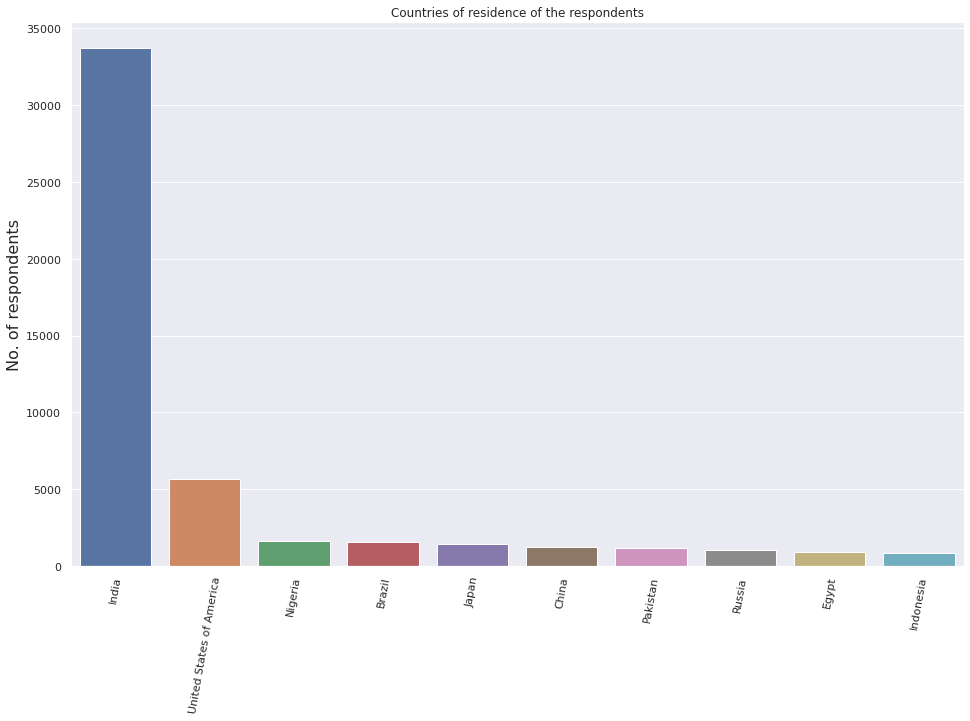

In [254]:
plt.figure(figsize=(16,10))
plt.title("Countries of residence of the respondents")
plt.xticks(rotation=80)
sns.set(font_scale=2)
sns.barplot(x=country_count_top_10.index, y=country_count_top_10)
plt.ylabel('No. of respondents', fontsize=16);

As we can see from the graph, the majority of the respondents are from India. There are nearly 7 times more respondents from India than the next largest country, namely the USA. We'll have to keep this in mind when performing any analysis on country demographics. 

The other countries with the highest amount of respondents are Nigeria, Brazil, Japan, China, Pakistan, Russia, Egypt, and Indonesia.

### Looking at the Education column

Now we'll look at the spread of data in the Education column. Let's remind ourselves of the survey question that was asked.

In [255]:
questions[3]

'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'

In [256]:
education_count = merged_df.Education.value_counts()
education_count

Bachelor’s degree                                                    28667
Master’s degree                                                      25779
Doctoral degree                                                       5370
Some college/university study without earning a bachelor’s degree     3143
I prefer not to answer                                                2151
No formal education past high school                                   970
Professional doctorate                                                 941
Name: Education, dtype: int64

Let's visualise the spread of countries.

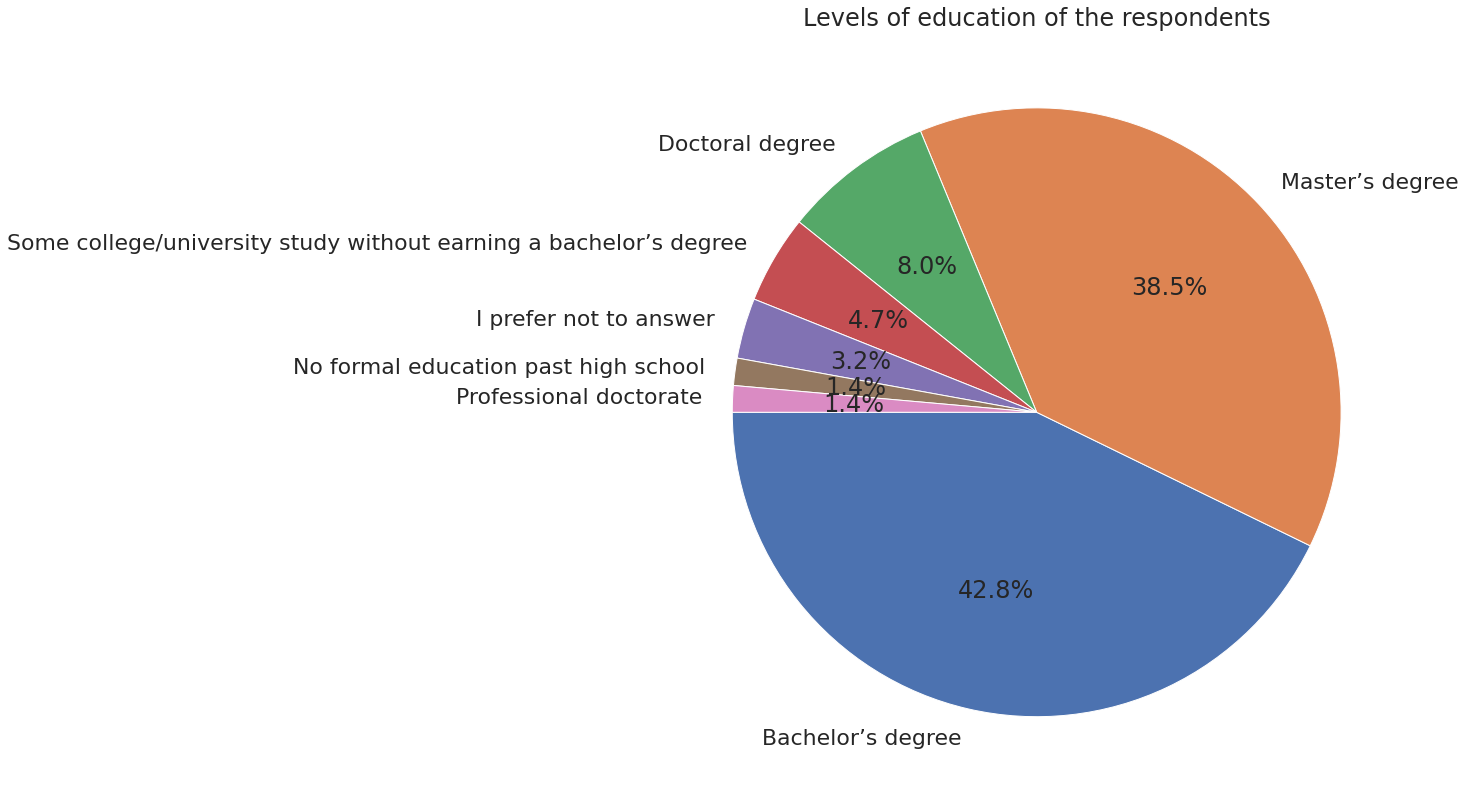

In [257]:
plt.figure(figsize=(20,14))
plt.title("Levels of education of the respondents")
plt.pie(education_count, labels=education_count.index, autopct='%1.1f%%', startangle=180);

As you can see from the graph, the most common level of education of the respondents is a Bachelor's degree, closely followed by a Master's degree. These two education levels combined make up 81.3% of the levels of education of the respondents. The other ~20% of the respondents have doctoral degrees, some college experience, no education beyond high school, or have chosen not to respond. 

### Looking at the Role column

Now we'll look at the spread of data in the Role (job role) column. Let's remind ourselves of the survey question that was asked.

In [258]:
questions[4]

'Select the title most similar to your current role (or most recent title if retired): - Selected Choice'

In [259]:
job_count = merged_df.Role.value_counts()
job_count2 = job_count.drop(["Currently not employed"])
job_count2 = job_count2.drop(["Other"])
job_count2 = job_count2.drop(["Student"])
job_count

Currently not employed                                              21028
Student                                                              6804
Data Scientist                                                       5483
Software Engineer                                                    3650
Other                                                                3093
Data Analyst                                                         2301
Research Scientist                                                   2084
Data Analyst (Business, Marketing, Financial, Quantitative, etc)     1538
Machine Learning Engineer                                            1499
Data Engineer                                                        1005
Business Analyst                                                      968
Program/Project Manager                                               849
Teacher / professor                                                   833
Manager (Program, Project, Operations,

A large number of the respondents are currently not employed so we will keep this in mind during the analysis.

Let's visualise the spread of job roles.

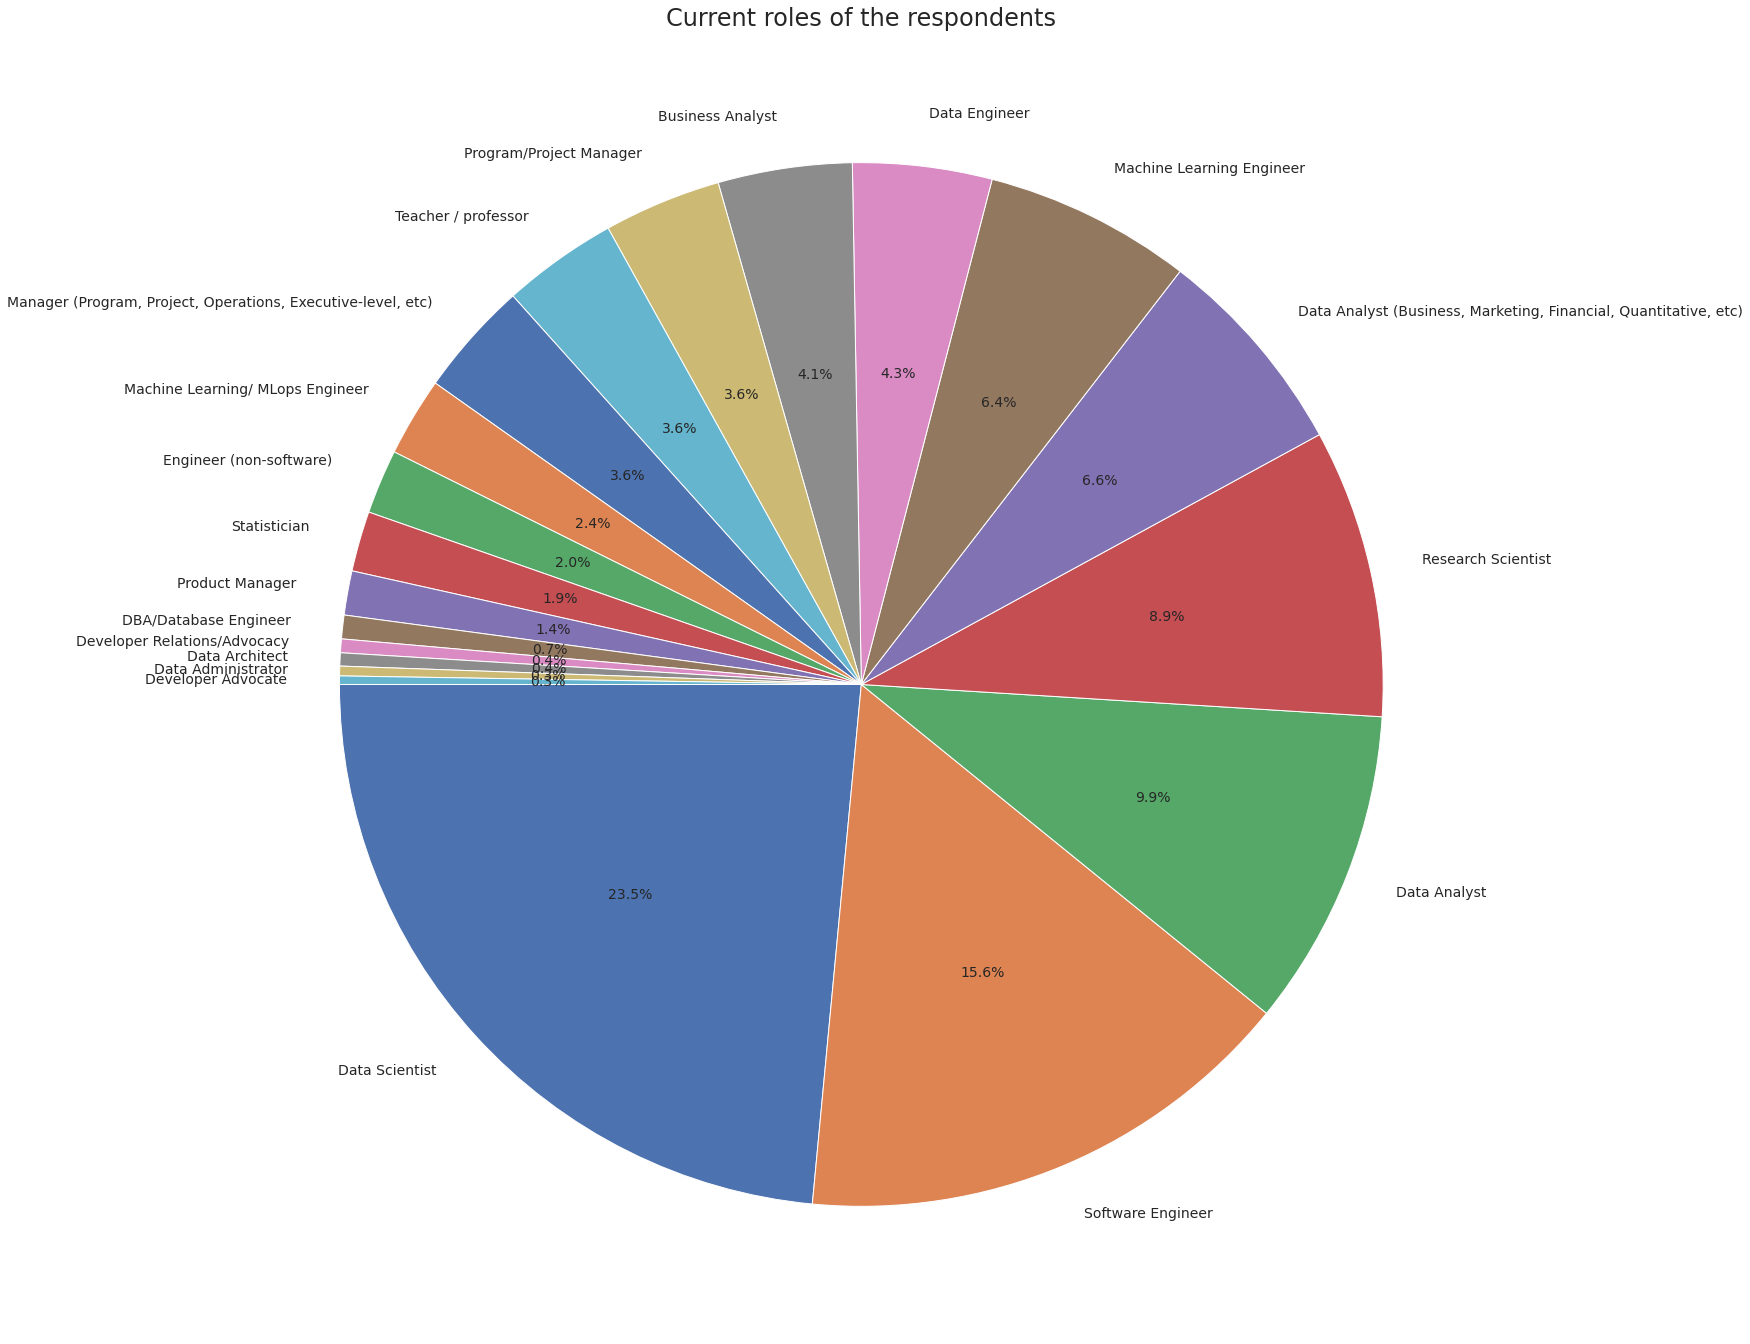

In [260]:
plt.figure(figsize=(30,24))
plt.title("Current roles of the respondents")
plt.pie(job_count2, labels=job_count2.index, autopct='%1.1f%%', textprops={'fontsize': 14}, startangle=180);

As you can see from the graph, the most common current role of the respondents is Data Scientist with 23.5% of the respondents choosing this option. The next most common roles are Software Engineer with 15.6% and Data Analyst with 9.9%.

### Looking at the Field column

Now we'll look at the spread of data in the Field (job field) column. Let's remind ourselves of the survey question that was asked.

In [261]:
questions[5]

'In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice'

In [262]:
field_count = merged_df.Field.value_counts()
field_count2 = field_count.drop(["Other"])
field_count

Computers/Technology                      6619
Academics/Education                       4645
Accounting/Finance                        2228
Other                                     1849
Manufacturing/Fabrication                 1426
Medical/Pharmaceutical                    1270
Government/Public Service                 1211
Online Service/Internet-based Services    1028
Retail/Sales                               925
Energy/Mining                              876
Insurance/Risk Assessment                  671
Marketing/CRM                              615
Broadcasting/Communications                500
Non-profit/Service                         493
Shipping/Transportation                    461
Online Business/Internet-based Sales       275
Military/Security/Defense                  197
Hospitality/Entertainment/Sports           173
Name: Field, dtype: int64

In [263]:
top_3_fields = field_count.head(3)
top_3_fields

Computers/Technology    6619
Academics/Education     4645
Accounting/Finance      2228
Name: Field, dtype: int64

Let's visualise the spread of Field responses.

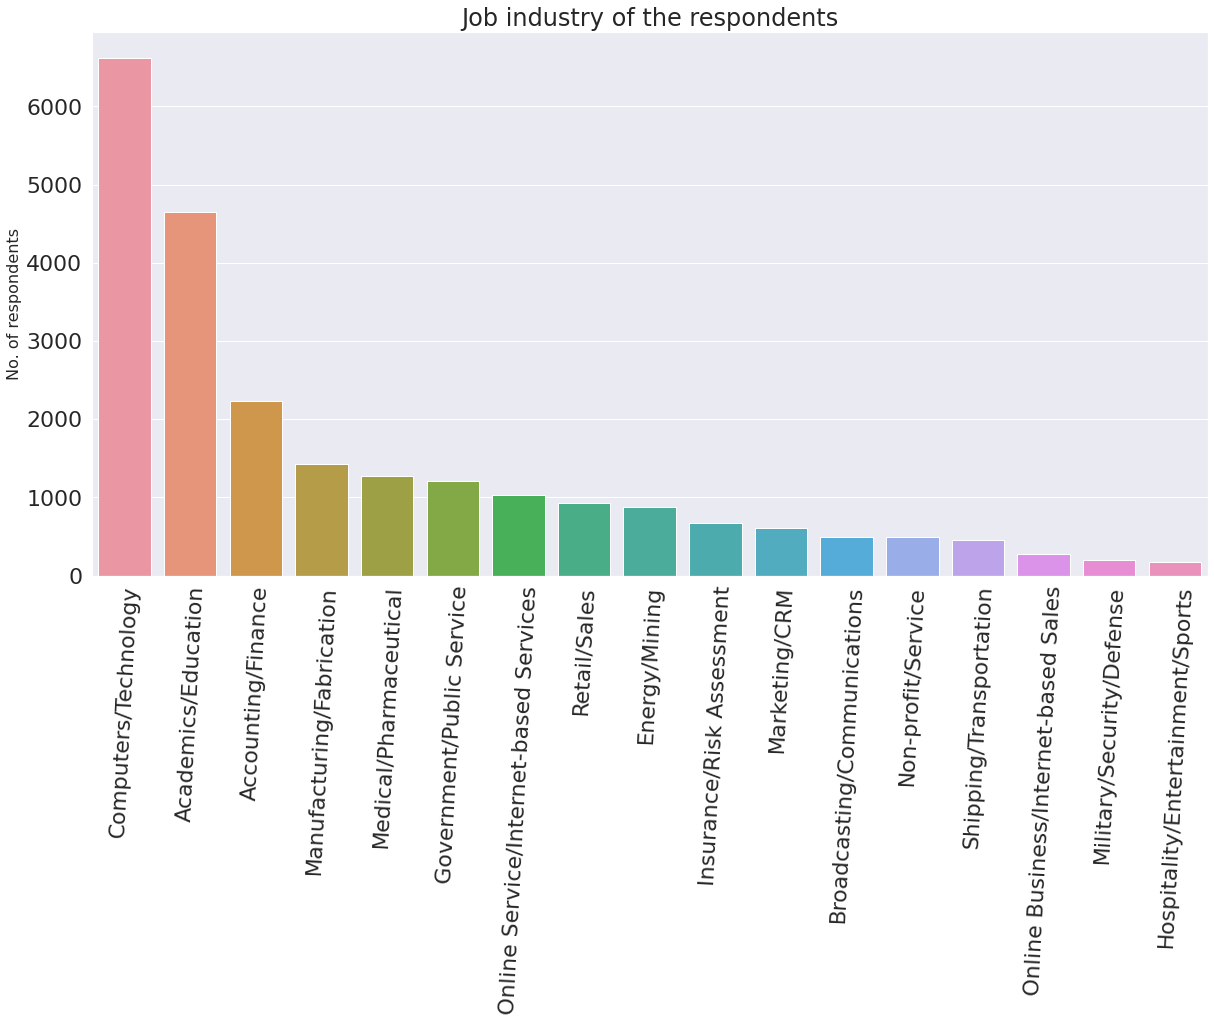

In [264]:
plt.figure(figsize=(20,10))
plt.title("Job industry of the respondents")
plt.xticks(rotation=87)
sns.barplot(x=field_count2.index, y=field_count2)
plt.ylabel('No. of respondents', fontsize=16);

I think somewhat unsurprisingly given that this survey was distributed to Kaggle users, Computers/Technology is the most common job industry of the respondents. This is followed by Academics\Education and Accounting/Finance.

### Looking at the Salary column

Now we'll look at the spread of data in the Salary column. Let's remind ourselves of the survey question that was asked.

In [265]:
questions[6]

'What is your current yearly compensation (approximate $USD)?'

In [266]:
salary_counts = merged_df.Salary.value_counts()
salary_counts

$0-999              4600
10,000-14,999       1436
1,000-1,999         1392
30,000-39,999       1194
5,000-7,499         1182
100,000-124,999     1110
40,000-49,999       1095
50,000-59,999       1048
7,500-9,999          917
20,000-24,999        909
15,000-19,999        858
60,000-69,999        856
2,000-2,999          838
70,000-79,999        747
25,000-29,999        739
4,000-4,999          725
150,000-199,999      705
125,000-149,999      633
3,000-3,999          614
80,000-89,999        610
90,000-99,999        536
200,000-249,999      324
300,000-499,999      162
250,000-299,999      151
>$1,000,000           81
$500,000-999,999      78
Name: Salary, dtype: int64

Let's visualise the spread of salary data.

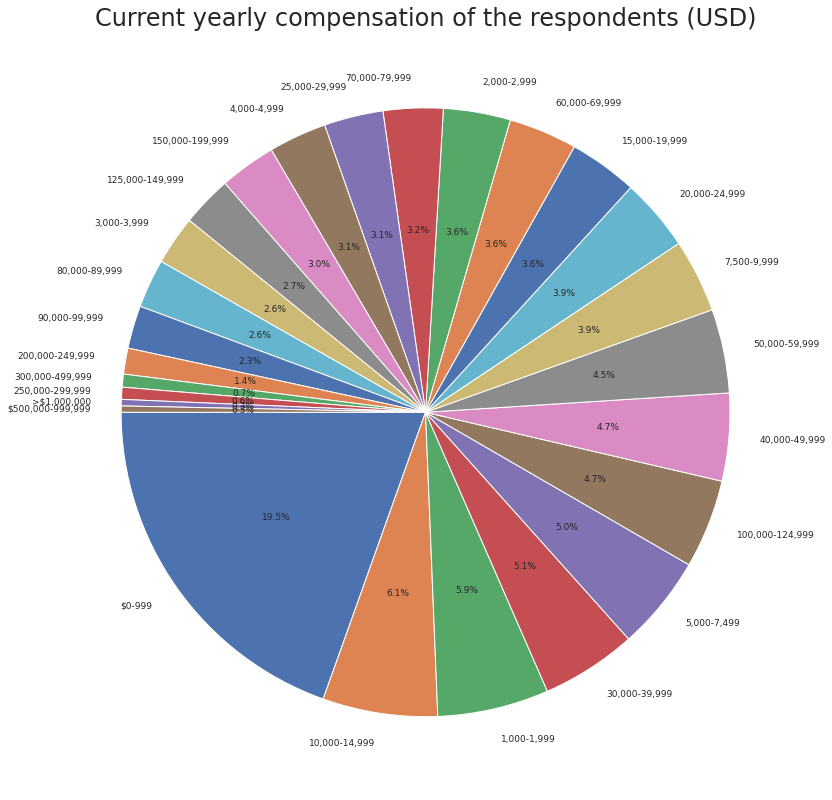

In [267]:
plt.figure(figsize=(20,14))
plt.title("Current yearly compensation of the respondents (USD)")
plt.pie(salary_counts, labels=salary_counts.index, autopct='%1.1f%%',textprops={'fontsize': 9}, startangle=180);

Interestingly, the most common salary range making up 20% of the respondents is \\$0 - 999. I would guess that many of the respondents who choose this option are students or interns. This is followed by \\$10,000 - 14,999 with 6.1% and \\$1,000 - 1,999 with 5.9%. It's important to remember that the salaries are reported in USD for our analysis. 

## Questions and responses

We're now going to explore the relationships between columns as opposed to the previous section where we looked at individual, column wise data. 

### Question 1. Do certain job titles lend themselves to be more gender specific?

#### EDA

As a woman who studied mathematics, I know what it's like to not only be in a classroom where you are the only woman, but to also constantly be told that you are out of the ordinary for being a woman in a STEM related job. I'm curious to know if there is a strong relationship between certain job descriptions and gender from these surveys. 

We're going to start off by writing a function that takes in two columns of the categorical data from the merged_df, and outputs a numeric data frame.

In [268]:
def categorical_to_numeric(col_1, col_2):
    new_df = merged_df.groupby(col_1)[col_2].value_counts()
    new_df = new_df.unstack()
    new_df = new_df.fillna(0)
    new_df = new_df.transpose()
    return new_df

Now we'll create a data frame that shows the percentage of each gender that have certain roles. For example, you can notice that 1.7% of the men surveyed are Business Analysts. 

I've decided to find the percentage relevant to each gender since the range of genders of the respondents is so large, namely there were 55,146 male responses, 11,546 female responses, and 165 non-binary responses.

In [269]:
jobs_gend_df = categorical_to_numeric("Gender", "Role")
jobs_gend_df = jobs_gend_df.drop(["Prefer not to say", "Prefer to self-describe"], axis=1)

jobs_gend_df['Man'] = jobs_gend_df['Man'].apply(lambda x: (x / jobs_gend_df["Man"].sum())*100)
jobs_gend_df['Woman'] = jobs_gend_df['Woman'].apply(lambda x: (x / jobs_gend_df["Woman"].sum())*100)
jobs_gend_df['Nonbinary'] = jobs_gend_df['Nonbinary'].apply(lambda x: (x / jobs_gend_df["Nonbinary"].sum())*100)

jobs_gend_df = jobs_gend_df.transpose()

jobs_gend_df

## use element wise not lamda .apply(jobs_gend_df / jobs_gend_df["Man"].sum())*100)

Role,Business Analyst,Currently not employed,DBA/Database Engineer,Data Administrator,Data Analyst,"Data Analyst (Business, Marketing, Financial, Quantitative, etc)",Data Architect,Data Engineer,Data Scientist,Developer Advocate,...,Machine Learning/ MLops Engineer,"Manager (Program, Project, Operations, Executive-level, etc)",Other,Product Manager,Program/Project Manager,Research Scientist,Software Engineer,Statistician,Student,Teacher / professor
Gender,,,,,,,,,,,,,,,,,,,,,
Man,1.720330,41.334305,0.311382,0.123669,3.884546,2.623559,0.181087,1.855042,9.966433,0.110419,...,1.104192,1.578994,5.397288,0.587430,1.638620,3.688000,6.784153,0.717724,11.247295,1.232278
Nonbinary,2.459016,13.934426,0.819672,0.000000,4.098361,2.459016,1.639344,0.819672,9.836066,0.000000,...,0.819672,4.098361,5.737705,2.459016,2.459016,9.016393,8.196721,0.000000,21.311475,0.819672
Woman,2.108434,26.891566,0.240964,0.168675,6.084337,4.024096,0.096386,1.759036,10.554217,0.108434,...,0.698795,1.216867,7.156627,0.542169,1.096386,4.493976,6.337349,1.289157,18.963855,3.192771


#### Analysis

In [270]:
fig = px.bar(jobs_gend_df, x=jobs_gend_df.index, y=jobs_gend_df.columns, barmode='group', 
             width=1100, height=600, labels={
                     "Gender": "Gender",
                     "value": "Percentage of respondents",
                     "Role": "Roles"
                 },
                title="Percentage of respondents with certain roles vs. their gender")
fig.show()

There are a fair few interesting take aways from this visual:

1. The men surveyed have a much higher rate of unemployment.
2. Non-binary folks have the lowest rate of unemployment.
3. The percentage of data scientists is very similar amongst each gender.
4. There are larger percentages of students amongst non-binary people and women. 
5. Non-binary folks have the greatest percentage of research scientists.
6. Women have the largest percentage of teachers.
7. Women have the lowest percentage of machine learning engineers.

There are so many more interesting takeaways from this visual that we could find. I think the most telling conclusions that we can make are as follows:

* Data scientists make up an equal percentage of each gender. This means that for the amount of people interviewed, they are each equally likely to be data scientists.
* Men have a much larger percentage of unemployment and could therefore be more likely to be unemployed. We do need to consider that the majority of respondents are men so our pool of responses is likely to be more representative than women and non-binary folks. 
* Women have the largest percentage of teachers. This is a common trend globally as teaching is a profession that is assumed by women stereotypically.
* Women have the lowest percentage of machine learning engineers. This is also a common trend as women make up less of the engineering space. Hopefully with time we will see more women in ML engineering.

I'm going to display another visual of men and women side-by-side so we can have a closer look at how these two genders compare.

In [271]:
jobs_m_f_df = categorical_to_numeric("Gender", "Role")
jobs_m_f_df = jobs_m_f_df.drop(["Prefer not to say", "Prefer to self-describe", "Nonbinary"], axis=1)

jobs_m_f_df['Man'] = jobs_m_f_df['Man'].apply(lambda x: (x / jobs_m_f_df["Man"].sum())*100)
jobs_m_f_df['Woman'] = jobs_m_f_df['Woman'].apply(lambda x: (x / jobs_m_f_df["Woman"].sum())*100)


jobs_m_f_df = jobs_m_f_df.transpose()

fig = px.bar(jobs_m_f_df, x=jobs_m_f_df.index, y=jobs_m_f_df.columns, barmode='group', 
             width=1100, height=600, labels={
                     "Gender": "Gender",
                     "value": "Percentage of respondents",
                     "Role": "Roles"
                 },
                title="Percentage of respondents with certain roles vs. their gender")
fig.show()

### Question 2. Which countries have the highest and lowest reported salaries?

#### EDA

We'll now look at which countries have the highest reported salaries. Due to the various currencies and costs of living, I assume that each country will have a difference in average salaries. The salaries recorded in the surveys are reported in USD.

In [272]:
country_salary_df = categorical_to_numeric("Salary", "Country")

columns = ['$0-999', '1,000-1,999', '2,000-2,999','3,000-3,999', '4,000-4,999', 
        '5,000-7,499', '7,500-9,999','10,000-14,999', '15,000-19,999', 
        '20,000-24,999','25,000-29,999','30,000-39,999','40,000-49,999', 
        '50,000-59,999', '60,000-69,999','70,000-79,999', '80,000-89,999', 
        '90,000-99,999','100,000-124,999', '125,000-149,999', '150,000-199,999',
        '200,000-249,999', '250,000-299,999', '300,000-499,999', 
        '$500,000-999,999','>$1,000,000']

country_salary_df = country_salary_df[columns]
country_salary_df

Salary,$0-999,"1,000-1,999","2,000-2,999","3,000-3,999","4,000-4,999","5,000-7,499","7,500-9,999","10,000-14,999","15,000-19,999","20,000-24,999",...,"80,000-89,999","90,000-99,999","100,000-124,999","125,000-149,999","150,000-199,999","200,000-249,999","250,000-299,999","300,000-499,999","$500,000-999,999",">$1,000,000"
Country,,,,,,,,,,,,,,,,,,,,,
Algeria,14.0,5.0,1.0,0.0,2.0,2.0,0.0,0.0,2.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Argentina,32.0,21.0,9.0,8.0,5.0,15.0,19.0,28.0,18.0,13.0,...,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
Australia,20.0,1.0,1.0,1.0,0.0,1.0,1.0,2.0,0.0,2.0,...,21.0,21.0,55.0,24.0,22.0,10.0,5.0,1.0,4.0,0.0
Austria,5.0,1.0,3.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,...,2.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
Bangladesh,82.0,14.0,13.0,7.0,8.0,15.0,17.0,11.0,4.0,3.0,...,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Arab Emirates,13.0,6.0,6.0,7.0,2.0,5.0,5.0,6.0,4.0,4.0,...,2.0,9.0,13.0,4.0,6.0,3.0,0.0,0.0,2.0,1.0
United Kingdom of Great Britain and Northern Ireland,26.0,2.0,4.0,1.0,1.0,1.0,4.0,6.0,5.0,17.0,...,37.0,27.0,42.0,24.0,22.0,11.0,5.0,4.0,5.0,1.0
United States of America,187.0,10.0,18.0,7.0,7.0,16.0,17.0,32.0,20.0,43.0,...,179.0,181.0,454.0,357.0,483.0,212.0,103.0,108.0,45.0,23.0


In [273]:
highest_salary_count = country_salary_df[">$1,000,000"].idxmax()
second_highest_salary_count = country_salary_df["$500,000-999,999"].idxmax()
third_highest_salary_count = country_salary_df["300,000-499,999"].idxmax()

print("The country with the highest amount of respondents making more than $1,000,000 a year is {}. The country with the highest amount of respondents making between $500,000 - $999,999 a year is {}. And the country with the highest amount of respondents making between $300,000 - $499,999 a year is {}.".format(highest_salary_count, second_highest_salary_count, third_highest_salary_count))


The country with the highest amount of respondents making more than $1,000,000 a year is United States of America. The country with the highest amount of respondents making between $500,000 - $999,999 a year is United States of America. And the country with the highest amount of respondents making between $300,000 - $499,999 a year is United States of America.


In [274]:
lowest_salary_count = country_salary_df["$0-999"].idxmax()
second_lowest_salary_count = country_salary_df["1,000-1,999"].idxmax()
third_lowest_salary_count = country_salary_df["2,000-2,999"].idxmax()

print("The country with the highest amount of respondents making between $0 - $999 a year is {}. The country with the highest amount of respondents making between $1,000 - $1,999 a year is {}. And the country with the highest amount of respondents making between $2,000 - $2,999 a year is {}.".format(lowest_salary_count, second_lowest_salary_count, third_lowest_salary_count))


The country with the highest amount of respondents making between $0 - $999 a year is India. The country with the highest amount of respondents making between $1,000 - $1,999 a year is India. And the country with the highest amount of respondents making between $2,000 - $2,999 a year is India.


We know from prior analysis of the Country column that the two countries that account for the most respondents are India and the USA. So let's look at the data again, but this time we'll make sure to consider the demographics of the respondents by finding the count of salaries per million people of the specific country. 

We'll start by downloading a Github csv that contains countries and their populations.

In [275]:
urlretrieve('https://gist.githubusercontent.com/aakashns/8684589ef4f266116cdce023377fc9c8/raw/99ce3826b2a9d1e6d0bde7e9e559fc8b6e9ac88b/locations.csv', 
            'locations.csv')

('locations.csv', <http.client.HTTPMessage at 0x7efc3d28a7c0>)

In [276]:
selected_cols_locations = ["location", "continent", "population"]

In [277]:
locations_df = pd.read_csv('locations.csv', usecols=selected_cols_locations, low_memory=False)
locations_df

,location,continent,population
0,Afghanistan,Asia,3.892834e+07
1,Albania,Europe,2.877800e+06
2,Algeria,Africa,4.385104e+07
3,Andorra,Europe,7.726500e+04
4,Angola,Africa,3.286627e+07
...,...,...,...
207,Yemen,Asia,2.982597e+07
208,Zambia,Africa,1.838396e+07
209,Zimbabwe,Africa,1.486293e+07
210,World,NaN,7.794799e+09


In [278]:
locations_df = locations_df.rename({'location': 'Country'}, axis=1)
locations_df

,Country,continent,population
0,Afghanistan,Asia,3.892834e+07
1,Albania,Europe,2.877800e+06
2,Algeria,Africa,4.385104e+07
3,Andorra,Europe,7.726500e+04
4,Angola,Africa,3.286627e+07
...,...,...,...
207,Yemen,Asia,2.982597e+07
208,Zambia,Africa,1.838396e+07
209,Zimbabwe,Africa,1.486293e+07
210,World,NaN,7.794799e+09


In [279]:
locations_df['Country'] = locations_df['Country'].replace({'United States': 'United States of America',
                                                'United Kingdom': 'United Kingdom of Great Britain and Northern Ireland',
                                                'Vietnam': 'Viet Nam'})

locations_df

,Country,continent,population
0,Afghanistan,Asia,3.892834e+07
1,Albania,Europe,2.877800e+06
2,Algeria,Africa,4.385104e+07
3,Andorra,Europe,7.726500e+04
4,Angola,Africa,3.286627e+07
...,...,...,...
207,Yemen,Asia,2.982597e+07
208,Zambia,Africa,1.838396e+07
209,Zimbabwe,Africa,1.486293e+07
210,World,NaN,7.794799e+09


And now we can merge the data frames to create one that consists of continents and populations.

In [280]:
country_salary_df = country_salary_df.merge(locations_df, left_index=True, right_on='Country')

country_salary_df

,$0-999,"1,000-1,999","2,000-2,999","3,000-3,999","4,000-4,999","5,000-7,499","7,500-9,999","10,000-14,999","15,000-19,999","20,000-24,999",...,"125,000-149,999","150,000-199,999","200,000-249,999","250,000-299,999","300,000-499,999","$500,000-999,999",">$1,000,000",Country,continent,population
2,14.0,5.0,1.0,0.0,2.0,2.0,0.0,0.0,2.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Algeria,Africa,43851043.0
7,32.0,21.0,9.0,8.0,5.0,15.0,19.0,28.0,18.0,13.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,Argentina,South America,45195777.0
10,20.0,1.0,1.0,1.0,0.0,1.0,1.0,2.0,0.0,2.0,...,24.0,22.0,10.0,5.0,1.0,4.0,0.0,Australia,Oceania,25499881.0
11,5.0,1.0,3.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,Austria,Europe,9006400.0
15,82.0,14.0,13.0,7.0,8.0,15.0,17.0,11.0,4.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bangladesh,Asia,164689383.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,13.0,6.0,6.0,7.0,2.0,5.0,5.0,6.0,4.0,4.0,...,4.0,6.0,3.0,0.0,0.0,2.0,1.0,United Arab Emirates,Asia,9890400.0
198,26.0,2.0,4.0,1.0,1.0,1.0,4.0,6.0,5.0,17.0,...,24.0,22.0,11.0,5.0,4.0,5.0,1.0,United Kingdom of Great Britain and Northern I...,Europe,67886004.0
199,187.0,10.0,18.0,7.0,7.0,16.0,17.0,32.0,20.0,43.0,...,357.0,483.0,212.0,103.0,108.0,45.0,23.0,United States of America,North America,331002647.0
205,77.0,30.0,15.0,2.0,6.0,16.0,8.0,15.0,6.0,9.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,Viet Nam,Asia,97338583.0


Now we can find the count for each salary per million people based on the population of each country.

In [281]:
result = country_salary_df.iloc[:,:26].div(country_salary_df.population, axis=0)
result2 = result.multiply(1e6)
result2

,$0-999,"1,000-1,999","2,000-2,999","3,000-3,999","4,000-4,999","5,000-7,499","7,500-9,999","10,000-14,999","15,000-19,999","20,000-24,999",...,"80,000-89,999","90,000-99,999","100,000-124,999","125,000-149,999","150,000-199,999","200,000-249,999","250,000-299,999","300,000-499,999","$500,000-999,999",">$1,000,000"
2,0.319263,0.114022,0.022804,0.000000,0.045609,0.045609,0.000000,0.000000,0.045609,0.022804,...,0.000000,0.000000,0.022804,0.000000,0.000000,0.022804,0.000000,0.000000,0.000000,0.000000
7,0.708031,0.464645,0.199134,0.177008,0.110630,0.331889,0.420393,0.619527,0.398267,0.287637,...,0.066378,0.022126,0.022126,0.022126,0.000000,0.000000,0.000000,0.000000,0.000000,0.022126
10,0.784317,0.039216,0.039216,0.039216,0.000000,0.039216,0.039216,0.078432,0.000000,0.078432,...,0.823533,0.823533,2.156873,0.941181,0.862749,0.392159,0.196079,0.039216,0.156863,0.000000
11,0.555161,0.111032,0.333096,0.000000,0.000000,0.111032,0.000000,0.222064,0.111032,0.000000,...,0.222064,0.222064,0.111032,0.111032,0.111032,0.000000,0.000000,0.000000,0.000000,0.111032
15,0.497907,0.085009,0.078936,0.042504,0.048576,0.091081,0.103225,0.066792,0.024288,0.018216,...,0.006072,0.012144,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,1.314406,0.606649,0.606649,0.707757,0.202216,0.505541,0.505541,0.606649,0.404433,0.404433,...,0.202216,0.909973,1.314406,0.404433,0.606649,0.303324,0.000000,0.000000,0.202216,0.101108
198,0.382995,0.029461,0.058922,0.014731,0.014731,0.014731,0.058922,0.088383,0.073653,0.250420,...,0.545031,0.397726,0.618684,0.353534,0.324073,0.162036,0.073653,0.058922,0.073653,0.014731
199,0.564950,0.030211,0.054380,0.021148,0.021148,0.048338,0.051359,0.096676,0.060422,0.129908,...,0.540781,0.546823,1.371590,1.078541,1.459203,0.640478,0.311176,0.326281,0.135951,0.069486
205,0.791053,0.308203,0.154101,0.020547,0.061641,0.164375,0.082187,0.154101,0.061641,0.092461,...,0.000000,0.000000,0.010273,0.000000,0.020547,0.000000,0.000000,0.000000,0.000000,0.000000


Now we need to add the country column back to our resulting data frame.

In [282]:
pop_per_mill_df = pd.concat((result2, country_salary_df.Country), axis=1)
pop_per_mill_df

,$0-999,"1,000-1,999","2,000-2,999","3,000-3,999","4,000-4,999","5,000-7,499","7,500-9,999","10,000-14,999","15,000-19,999","20,000-24,999",...,"90,000-99,999","100,000-124,999","125,000-149,999","150,000-199,999","200,000-249,999","250,000-299,999","300,000-499,999","$500,000-999,999",">$1,000,000",Country
2,0.319263,0.114022,0.022804,0.000000,0.045609,0.045609,0.000000,0.000000,0.045609,0.022804,...,0.000000,0.022804,0.000000,0.000000,0.022804,0.000000,0.000000,0.000000,0.000000,Algeria
7,0.708031,0.464645,0.199134,0.177008,0.110630,0.331889,0.420393,0.619527,0.398267,0.287637,...,0.022126,0.022126,0.022126,0.000000,0.000000,0.000000,0.000000,0.000000,0.022126,Argentina
10,0.784317,0.039216,0.039216,0.039216,0.000000,0.039216,0.039216,0.078432,0.000000,0.078432,...,0.823533,2.156873,0.941181,0.862749,0.392159,0.196079,0.039216,0.156863,0.000000,Australia
11,0.555161,0.111032,0.333096,0.000000,0.000000,0.111032,0.000000,0.222064,0.111032,0.000000,...,0.222064,0.111032,0.111032,0.111032,0.000000,0.000000,0.000000,0.000000,0.111032,Austria
15,0.497907,0.085009,0.078936,0.042504,0.048576,0.091081,0.103225,0.066792,0.024288,0.018216,...,0.012144,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Bangladesh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,1.314406,0.606649,0.606649,0.707757,0.202216,0.505541,0.505541,0.606649,0.404433,0.404433,...,0.909973,1.314406,0.404433,0.606649,0.303324,0.000000,0.000000,0.202216,0.101108,United Arab Emirates
198,0.382995,0.029461,0.058922,0.014731,0.014731,0.014731,0.058922,0.088383,0.073653,0.250420,...,0.397726,0.618684,0.353534,0.324073,0.162036,0.073653,0.058922,0.073653,0.014731,United Kingdom of Great Britain and Northern I...
199,0.564950,0.030211,0.054380,0.021148,0.021148,0.048338,0.051359,0.096676,0.060422,0.129908,...,0.546823,1.371590,1.078541,1.459203,0.640478,0.311176,0.326281,0.135951,0.069486,United States of America
205,0.791053,0.308203,0.154101,0.020547,0.061641,0.164375,0.082187,0.154101,0.061641,0.092461,...,0.000000,0.010273,0.000000,0.020547,0.000000,0.000000,0.000000,0.000000,0.000000,Viet Nam


#### Analysis

We now have a more accurate representation of salary counts based on the populations of each country. Let's look at the top 5 countries in the top earning salary category, making more than \\$1,000,000 a year.

We'll first access the indexes of the top 5 countries, followed by using .loc to find the corresponding countries.

In [283]:
pop_per_mill_df[">$1,000,000"].sort_values(ascending=False).head(5)

96     0.346599
183    0.115545
11     0.111032
197    0.101108
199    0.069486
Name: >$1,000,000, dtype: float64

In [284]:
highest_salary_count_val = pop_per_mill_df.loc[pop_per_mill_df.index == 96, 'Country']
highest_salary_count_val

96    Israel
Name: Country, dtype: object

In [285]:
second_highest_salary_count_val = pop_per_mill_df.loc[pop_per_mill_df.index == 183, 'Country']
second_highest_salary_count_val

183    Switzerland
Name: Country, dtype: object

In [286]:
third_highest_salary_count_val = pop_per_mill_df.loc[pop_per_mill_df.index == 11, 'Country']
third_highest_salary_count_val

11    Austria
Name: Country, dtype: object

In [287]:
fourth_highest_salary_count_val = pop_per_mill_df.loc[pop_per_mill_df.index == 197, 'Country']
fourth_highest_salary_count_val

197    United Arab Emirates
Name: Country, dtype: object

In [288]:
fifth_highest_salary_count_val = pop_per_mill_df.loc[pop_per_mill_df.index == 199, 'Country']
fifth_highest_salary_count_val

199    United States of America
Name: Country, dtype: object

As you can see, the top 5 countries in terms of the highest reported salaries are:

1. Isreal
2. Switzerland
3. Austria
4. United Arab Emirates
5. United States of America

The USA is still in amongst the top salary earners, but is no longer in first due to our normalising of the data.

We'll now access the indexes of the lowest 5 reported salary earnings, followed by using .loc to find the corresponding countries.

In [289]:
pop_per_mill_df["$0-999"].sort_values(ascending=False).head(5)

192    2.453756
58     1.778483
178    1.494402
185    1.385578
197    1.314406
Name: $0-999, dtype: float64

In [290]:
lowest_salary_count_val = pop_per_mill_df.loc[pop_per_mill_df.index == 192, 'Country']
lowest_salary_count_val

192    Tunisia
Name: Country, dtype: object

In [291]:
second_lowest_salary_count_val = pop_per_mill_df.loc[pop_per_mill_df.index == 58, 'Country']
second_lowest_salary_count_val

58    Egypt
Name: Country, dtype: object

In [292]:
third_lowest_salary_count_val = pop_per_mill_df.loc[pop_per_mill_df.index == 178, 'Country']
third_lowest_salary_count_val

178    Sri Lanka
Name: Country, dtype: object

In [293]:
fourth_lowest_salary_count_val = pop_per_mill_df.loc[pop_per_mill_df.index == 185, 'Country']
fourth_lowest_salary_count_val

185    Taiwan
Name: Country, dtype: object

In [294]:
fifth_lowest_salary_count_val = pop_per_mill_df.loc[pop_per_mill_df.index == 197, 'Country']
fifth_lowest_salary_count_val

197    United Arab Emirates
Name: Country, dtype: object

As you can see, the top 5 countries in terms of the lowest reported salaries are:

1. Tunisia
2. Egypt
3. Sri Lanka
4. Taiwan
5. United Arab Emirates

Interestingly, the UAE appears in both the top and the lowest salary earnings. We can also notice that since we normalised the data, India is no longer amongst the lowest salary earners.

In [295]:
high_salary_df = pd.DataFrame(
    {
        "Countries": ["Israel", "Switzerland", "Austria", "UAE", 
                      "USA"],
        "Count_per_mill": [0.35, 0.12, 0.11, 0.10, 0.07],
    }
)

low_salary_df = pd.DataFrame(
    {
        "Countries": ["Tunisia", "Egypt", "Sri Lanka",
                      "Taiwan", "UAE"],
        "Count_per_mill": [ 2.45, 1.78, 1.49,
                            1.39, 1.31],
    }
)

Let's look at a visualisation of the countries that have the highest reported salaries, as well as the lowest reported salaries.

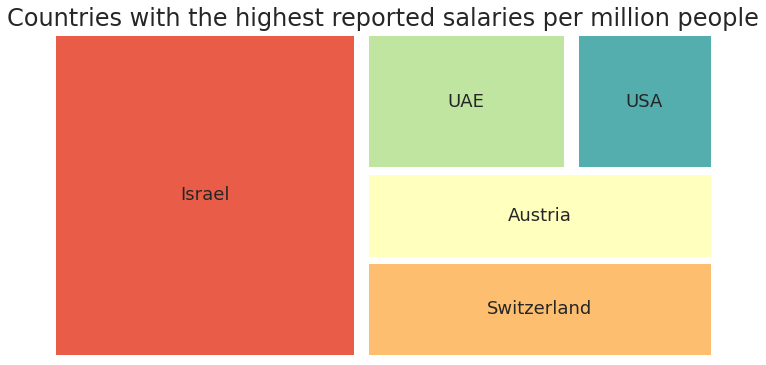

In [296]:
plt.figure(figsize=(12, 6))

plt.axis("off")
axis = sq.plot(sizes=high_salary_df.Count_per_mill, label=high_salary_df.Countries,
                     color=sns.color_palette("Spectral", len(high_salary_df.Count_per_mill.value_counts())),
                     pad=1,
                     text_kwargs={'fontsize': 18})
axis.set_title("Countries with the highest reported salaries per million people", fontsize=24);


The visual shows us quite clearly that Israel has the highest count per million people of people making the highest salaries of more than \\$1,000,000 annually. It also shows that the spread of countries making the highest salaries is not even.

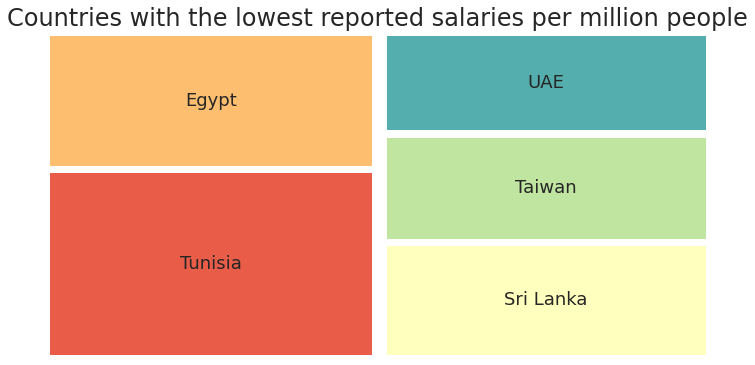

In [297]:
plt.figure(figsize=(12, 6))

plt.axis("off")
axis = sq.plot(sizes=low_salary_df.Count_per_mill, label=low_salary_df.Countries,
                     color=sns.color_palette("Spectral", len(low_salary_df.Count_per_mill.value_counts())),
                     pad=1,
                     text_kwargs={'fontsize': 18})
axis.set_title("Countries with the lowest reported salaries per million people", fontsize=24);

The visual shows that Tunisia is the country with the highest count per million people of people making the lowest annual salaries between \\$0-999. It also shows that the spread amongst the countries with the lowest salary makers is quite even.

### Question 3. Which roles have the highest reported salaries?

#### EDA

We'll now look at how certain Roles and Salary relate in order to find the most lucrative roles. We'll only consider the annual salaries that are greater than $5,000 USD.

In [298]:
role_salary_df = categorical_to_numeric("Salary", "Role")
role_salary_df = role_salary_df.drop(["$0-999", "1,000-1,999", "2,000-2,999", "4,000-4,999"], axis=1)
role_salary_df = role_salary_df.loc[:, ["5,000-7,499","7,500-9,999","10,000-14,999","15,000-19,999", "25,000-29,999", 
                       "40,000-49,999", '30,000-39,999','40,000-49,999', 
                       '50,000-59,999', '60,000-69,999', 
                       '70,000-79,999', '80,000-89,999', '90,000-99,999',
                       '100,000-124,999', '125,000-149,999', '150,000-199,999',
                       '200,000-249,999', '250,000-299,999', '300,000-499,999', '$500,000-999,999',
                       '>$1,000,000']]
role_salary_df

Salary,"5,000-7,499","7,500-9,999","10,000-14,999","15,000-19,999","25,000-29,999","40,000-49,999","30,000-39,999","40,000-49,999","50,000-59,999","60,000-69,999",...,"80,000-89,999","90,000-99,999","100,000-124,999","125,000-149,999","150,000-199,999","200,000-249,999","250,000-299,999","300,000-499,999","$500,000-999,999",">$1,000,000"
Role,,,,,,,,,,,,,,,,,,,,,
Business Analyst,46.0,45.0,62.0,40.0,29.0,41.0,61.0,41.0,45.0,31.0,...,27.0,21.0,38.0,18.0,7.0,5.0,2.0,0.0,0.0,4.0
DBA/Database Engineer,15.0,4.0,10.0,6.0,6.0,7.0,8.0,7.0,7.0,2.0,...,2.0,6.0,9.0,6.0,7.0,2.0,0.0,0.0,0.0,0.0
Data Administrator,1.0,5.0,5.0,1.0,1.0,3.0,4.0,3.0,6.0,3.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Data Analyst,112.0,95.0,145.0,76.0,54.0,84.0,74.0,84.0,74.0,78.0,...,41.0,25.0,70.0,14.0,10.0,4.0,3.0,3.0,1.0,2.0
"Data Analyst (Business, Marketing, Financial, Quantitative, etc)",82.0,83.0,106.0,61.0,38.0,39.0,69.0,39.0,40.0,48.0,...,36.0,32.0,49.0,20.0,15.0,6.0,2.0,5.0,2.0,3.0
Data Architect,1.0,1.0,2.0,0.0,4.0,4.0,6.0,4.0,4.0,4.0,...,2.0,5.0,6.0,3.0,11.0,4.0,0.0,2.0,1.0,0.0
Data Engineer,49.0,36.0,52.0,28.0,38.0,38.0,50.0,38.0,30.0,23.0,...,22.0,20.0,51.0,31.0,36.0,6.0,2.0,6.0,1.0,2.0
Data Scientist,148.0,124.0,256.0,159.0,176.0,234.0,253.0,234.0,225.0,183.0,...,158.0,119.0,288.0,194.0,223.0,108.0,34.0,36.0,13.0,21.0
Developer Advocate,3.0,4.0,1.0,1.0,2.0,2.0,4.0,2.0,2.0,5.0,...,3.0,0.0,1.0,1.0,3.0,1.0,0.0,4.0,0.0,0.0


We'll use a heatmap to better understand the relationship.

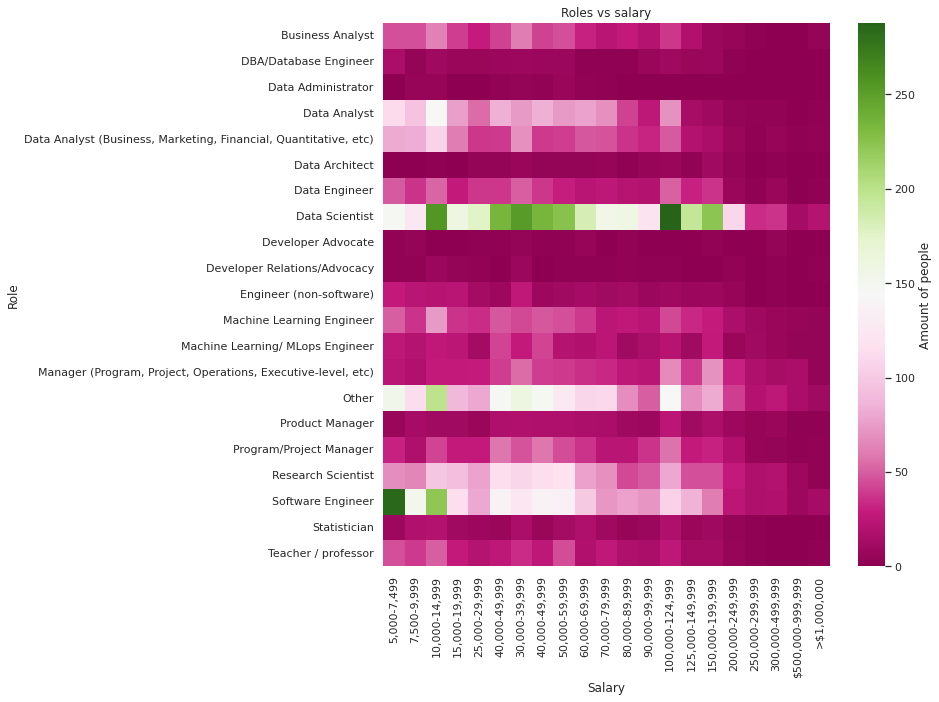

In [299]:
sns.set()
fig, ax = plt.subplots(figsize=(10,10)) 
ax = sns.heatmap(role_salary_df, cmap="PiYG", cbar_kws={'label': 'Amount of people'})
plt.title("Roles vs salary")
plt.show()

#### Analysis

It seems that data scientists are making the greatest annual salaries with 21 people claiming to make more than \\$1,000,000. A close second are software engineers with 13 people claiming to make more than \\$1,000,000. 

Interestingly, there are many data scientists, 288, who claim to make a salary between \\$100,000 - \\$124,999. This could be a good indication for the expected salary of a data scientist. And on a similar note, 285 software engineers claim to make a salary between \\$5,000 - \\$7,499. This seems like a huge contrast between the two roles, data scientists and software engineers, that I would not expect. 

It would be interesting to explore this further to understand the demographics of these respondents. Let's have a look at the age and locations of these software engineers.

In [300]:
software_eng_low_salary = merged_df[merged_df.Role == "Software Engineer"]
software_eng_low_salary = software_eng_low_salary[software_eng_low_salary.Salary == "5,000-7,499"]
software_eng_low_salary

,Age,Gender,Country,Education,Role,Field,Salary
19487,30-34,Man,Ghana,Master’s degree,Software Engineer,Academics/Education,"5,000-7,499"
19689,22-24,Man,India,Master’s degree,Software Engineer,Accounting/Finance,"5,000-7,499"
21449,22-24,Man,India,Bachelor’s degree,Software Engineer,Computers/Technology,"5,000-7,499"
21450,22-24,Man,India,Bachelor’s degree,Software Engineer,Computers/Technology,"5,000-7,499"
21451,22-24,Man,India,Bachelor’s degree,Software Engineer,Computers/Technology,"5,000-7,499"
...,...,...,...,...,...,...,...
65818,25-29,Man,India,Bachelor’s degree,Software Engineer,Manufacturing/Fabrication,"5,000-7,499"
66163,25-29,Man,Japan,Bachelor’s degree,Software Engineer,Computers/Technology,"5,000-7,499"
66599,35-39,Man,Pakistan,No formal education past high school,Software Engineer,Manufacturing/Fabrication,"5,000-7,499"
66924,22-24,Man,India,Bachelor’s degree,Software Engineer,Academics/Education,"5,000-7,499"


In [301]:
software_eng_low_salary.Age.value_counts().head(7)

22-24    143
25-29     77
30-34     25
35-39     14
18-21      8
40-44      7
45-49      6
Name: Age, dtype: int64

Most of these respondents are young, so it's possible they are just getting started in their careers.

In [302]:
software_eng_low_salary.Country.value_counts().head(7)

India         208
Japan          13
Other           8
Pakistan        7
Brazil          5
Bangladesh      5
China           4
Name: Country, dtype: int64

Most of these respondents are from India, where \\$5,000 - \\$7,499 is equal to ₹412,400 - ₹618,517. According to [Jobted.in](https://www.jobted.in/salary#:~:text=Average%20Salary%20in%20India%20(2022)&text=The%20average%20salary%20in%20India,or%20%E2%82%B932%2C840%20per%20month), the average salary per year for a software engineer is ₹5,17,000, so this is substantially lower than expected.

### Question 4. Is there a relationship between gender and salary?

#### EDA

We'll now look at how gender and salary relate. We are going to only focus on the genders male, female, and non-binary for our analysis.

My assumption is that due to gender wage gap  there will be statistically significant differences in pay between men and women, but we will let the data speak for itself.

In [303]:
salary_gender_df = merged_df.groupby("Salary")["Gender"].value_counts()
salary_gender_df = salary_gender_df.unstack()

salary_gender_df = salary_gender_df.drop(["Prefer not to say"], axis=1)
salary_gender_df = salary_gender_df.drop(["Prefer to self-describe"], axis=1)

salary_gender_df = salary_gender_df.fillna(0)

salary_gender_df['Man'] = salary_gender_df['Man'].apply(lambda x: (x / salary_gender_df["Man"].sum())*100)
salary_gender_df['Woman'] = salary_gender_df['Woman'].apply(lambda x: (x / salary_gender_df["Woman"].sum())*100)
salary_gender_df['Nonbinary'] = salary_gender_df['Nonbinary'].apply(lambda x: (x / salary_gender_df["Nonbinary"].sum())*100)


salary_gender_df = salary_gender_df.reindex(index = ['$0-999', '1,000-1,999', '2,000-2,999','3,000-3,999', '4,000-4,999', '5,000-7,499', '7,500-9,999',
                                    '10,000-14,999', '15,000-19,999', '20,000-24,999','25,000-29,999',
                                    '30,000-39,999','40,000-49,999', '50,000-59,999', '60,000-69,999', 
                                 '70,000-79,999', '80,000-89,999', '90,000-99,999',
                                 '100,000-124,999', '125,000-149,999', '150,000-199,999',
                                 '200,000-249,999', '250,000-299,999', '300,000-499,999', '$500,000-999,999','>$1,000,000'])

salary_gender_transposed_df = salary_gender_df.transpose()
salary_gender_transposed_df

Salary,$0-999,"1,000-1,999","2,000-2,999","3,000-3,999","4,000-4,999","5,000-7,499","7,500-9,999","10,000-14,999","15,000-19,999","20,000-24,999",...,"80,000-89,999","90,000-99,999","100,000-124,999","125,000-149,999","150,000-199,999","200,000-249,999","250,000-299,999","300,000-499,999","$500,000-999,999",">$1,000,000"
Gender,,,,,,,,,,,,,,,,,,,,,
Man,17.737003,5.825947,3.477945,2.539781,3.125486,5.172861,3.840771,6.240605,3.794122,4.011818,...,2.752294,2.342819,4.835951,2.809309,3.089203,1.508319,0.653087,0.725652,0.362826,0.352459
Nonbinary,10.144928,2.898551,2.898551,0.000000,1.449275,2.898551,4.347826,2.898551,0.000000,2.898551,...,1.449275,4.347826,13.043478,0.000000,7.246377,4.347826,0.000000,1.449275,0.000000,4.347826
Woman,28.101528,6.630407,4.040404,3.159803,2.978503,4.454804,4.273504,5.594406,3.056203,3.263403,...,1.813002,1.813002,3.781404,2.097902,2.253302,0.673401,0.492100,0.362600,0.181300,0.155400


We'll now transpose the data so we have two versions of the table and it's therefore easier to create various visual displays.

In [304]:
salary_gender_df

Gender,Man,Nonbinary,Woman
Salary,,,
$0-999,17.737003,10.144928,28.101528
"1,000-1,999",5.825947,2.898551,6.630407
"2,000-2,999",3.477945,2.898551,4.040404
"3,000-3,999",2.539781,0.000000,3.159803
"4,000-4,999",3.125486,1.449275,2.978503
"5,000-7,499",5.172861,2.898551,4.454804
"7,500-9,999",3.840771,4.347826,4.273504
"10,000-14,999",6.240605,2.898551,5.594406
"15,000-19,999",3.794122,0.000000,3.056203


#### Analysis

We'll now look at visual displays of the data so we can interpret if there are any relationships between gender and salary.

In [305]:
fig = px.bar(salary_gender_transposed_df, x=salary_gender_transposed_df.index, y=salary_gender_transposed_df.columns, 
            title="Percentage of genders vs. salaries")
fig.show()

In the display above, we can see what percentage of men, non-binary folks, and women are making a certain income range. It's important to note that the percentages calculated for each gender correspond to each gender. For example, out of all the men surveyed, 17.7% of these men make a salary between 
\\$0 - \\$999. 

If you follow the bars from bottom to top, you can notice that non-binary folks are doing the best when it comes to salary earnings. If we compare men to women, there is quite a noticeable decrease in the percentage of women making greater salaries. There is a larger percentage of women making salaries of lesser value.

In order to have a clearer picture of how men and womens salaries relate, let's look at the data side by side. 

In [306]:
salary_men_fem_df = merged_df.groupby("Salary")["Gender"].value_counts()
salary_men_fem_df = salary_men_fem_df.unstack()

salary_men_fem_df = salary_men_fem_df.drop(["Prefer not to say"], axis=1)
salary_men_fem_df = salary_men_fem_df.drop(["Prefer to self-describe"], axis=1)
salary_men_fem_df = salary_men_fem_df.drop(["Nonbinary"], axis=1)

salary_men_fem_df = salary_men_fem_df.fillna(0)

salary_men_fem_df['Man'] = salary_men_fem_df['Man'].apply(lambda x: (x / salary_men_fem_df["Man"].sum())*100)
salary_men_fem_df['Woman'] = salary_men_fem_df['Woman'].apply(lambda x: (x / salary_men_fem_df["Woman"].sum())*100)

salary_men_fem_df = salary_men_fem_df.reindex(index = ['$0-999', '1,000-1,999', '2,000-2,999','3,000-3,999', '4,000-4,999', '5,000-7,499', '7,500-9,999',
                                    '10,000-14,999', '15,000-19,999', '20,000-24,999','25,000-29,999',
                                    '30,000-39,999','40,000-49,999', '50,000-59,999', '60,000-69,999', 
                                 '70,000-79,999', '80,000-89,999', '90,000-99,999',
                                 '100,000-124,999', '125,000-149,999', '150,000-199,999',
                                 '200,000-249,999', '250,000-299,999', '300,000-499,999', '$500,000-999,999','>$1,000,000'])

salary_men_fem_transposed_df = salary_men_fem_df.transpose()
salary_men_fem_transposed_df

Salary,$0-999,"1,000-1,999","2,000-2,999","3,000-3,999","4,000-4,999","5,000-7,499","7,500-9,999","10,000-14,999","15,000-19,999","20,000-24,999",...,"80,000-89,999","90,000-99,999","100,000-124,999","125,000-149,999","150,000-199,999","200,000-249,999","250,000-299,999","300,000-499,999","$500,000-999,999",">$1,000,000"
Gender,,,,,,,,,,,,,,,,,,,,,
Man,17.737003,5.825947,3.477945,2.539781,3.125486,5.172861,3.840771,6.240605,3.794122,4.011818,...,2.752294,2.342819,4.835951,2.809309,3.089203,1.508319,0.653087,0.725652,0.362826,0.352459
Woman,28.101528,6.630407,4.040404,3.159803,2.978503,4.454804,4.273504,5.594406,3.056203,3.263403,...,1.813002,1.813002,3.781404,2.097902,2.253302,0.673401,0.492100,0.362600,0.181300,0.155400


In [307]:
fig = px.bar(salary_men_fem_transposed_df, x=salary_men_fem_transposed_df.index, y=salary_men_fem_transposed_df.columns, 
            title="Percentage of men and women vs. salaries")
fig.show()

It's now easier to notice the higher percentage of women making lower salaries. For example, about 60% of the women surveyed are making less than \\$14,999 a year while about 60% of the men surveyed are making less than \\$29,999. This is a substantial difference.

I'm going to create one more visual display to see if we can understand the wage gap more clearly.

In [308]:
fig = px.bar(salary_gender_df, x=salary_gender_df.index, y=["Man", "Woman", "Nonbinary"], 
             barmode='group', text_auto=True,
             title="Percentage of men and women vs. salaries")
fig.show()

In this final display, it is much more clear where the divide in salaries between men and women occurs. A greater percentage of women are making the salary ranges up until \\$4,000 - \\$4,999. There is a slight comeback at the range of \\$7,500 - \\$9,999, followed by men making up a higher percentage of every salary range from this point on. 

This graph clearly displays the gap in salary earnings between men and women. 

Interestingly, non-binary folks account for the highest percentage of the higher salary ranges in almost every single instance. This is not an outcome that I predicted from the onset of this project but I would be interested to explore this further.

### Question 5. Is there any correlation between education and job field?

We'll now look at how ones level of education impacts the the job field that they pursue.

#### EDA

In [309]:
edu_field_df = categorical_to_numeric("Education", "Field")
edu_field_transpose_df = edu_field_df.transpose()
edu_field_transpose_df = edu_field_transpose_df.reindex(index = ['No formal education past high school', 
                                             'Some college/university study without earning a bachelor’s degree', 
                                             'Bachelor’s degree', 'Master’s degree', 'Professional doctorate', 
                                             'I prefer not to answer'])
edu_field_df = edu_field_transpose_df.transpose()
edu_field_df = edu_field_df.div(edu_field_df.sum(axis=1), axis=0)
edu_field_df

Education,No formal education past high school,Some college/university study without earning a bachelor’s degree,Bachelor’s degree,Master’s degree,Professional doctorate,I prefer not to answer
Field,,,,,,
Academics/Education,0.023458,0.055965,0.290214,0.491622,0.081434,0.057306
Accounting/Finance,0.023902,0.035122,0.349268,0.551707,0.010732,0.029268
Broadcasting/Communications,0.020134,0.042506,0.357942,0.530201,0.024609,0.024609
Computers/Technology,0.016994,0.046197,0.420063,0.459495,0.016334,0.040917
Energy/Mining,0.019685,0.051181,0.337270,0.534121,0.013123,0.044619
Government/Public Service,0.019627,0.052012,0.292444,0.575074,0.025515,0.035329
Hospitality/Entertainment/Sports,0.038462,0.083333,0.397436,0.442308,0.006410,0.032051
Insurance/Risk Assessment,0.011290,0.043548,0.311290,0.580645,0.022581,0.030645
Manufacturing/Fabrication,0.029908,0.054448,0.317485,0.536043,0.011503,0.050613


#### Analysis

We'll now look at visual displays of the data so we can interpret if there are any relationships between education levels and field. The percentages that we'll be considering are across field. For example, across all people in the field of Academics/Education, 2.3% of them have no formal education past high school.

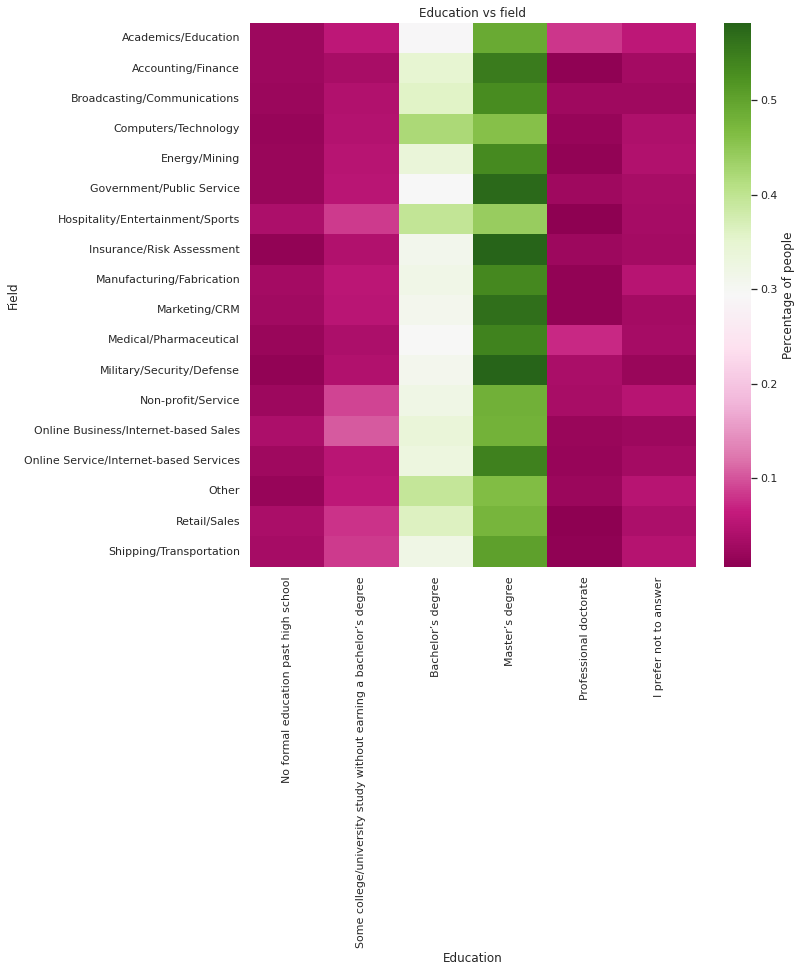

In [310]:
sns.set()
fig, ax = plt.subplots(figsize=(10,10)) 
ax = sns.heatmap(edu_field_df, cmap="PiYG", cbar_kws={'label': 'Percentage of people'})
plt.title("Education vs field")
plt.show()

One thing that is apparent straight away from this data display is that the percentage of our survey respondents across each field are most likely to have master's degrees. Let's draw some conclusions based on each education level.

In [311]:
edu_field_df["No formal education past high school"].sort_values(ascending=True)

Field
Insurance/Risk Assessment                 0.011290
Military/Security/Defense                 0.012121
Other                                     0.016908
Computers/Technology                      0.016994
Medical/Pharmaceutical                    0.018340
Government/Public Service                 0.019627
Energy/Mining                             0.019685
Broadcasting/Communications               0.020134
Non-profit/Service                        0.022727
Academics/Education                       0.023458
Accounting/Finance                        0.023902
Online Service/Internet-based Services    0.024546
Marketing/CRM                             0.028319
Manufacturing/Fabrication                 0.029908
Shipping/Transportation                   0.033019
Retail/Sales                              0.035880
Online Business/Internet-based Sales      0.038314
Hospitality/Entertainment/Sports          0.038462
Name: No formal education past high school, dtype: float64

The fields with the highest percentage of "No formal education past high school" in order from greatest to least are:
* Hospitality/Entertainment/Sports
* Online Business/Internet-based Sales
* Retail/Sales

The fields with the lowest percentage of this education level from least to greatest are:
* Insurance/Risk Assessment
* Military/Security/Defense
* Computers/Technology

In [312]:
edu_field_df["Some college/university study without earning a bachelor’s degree"].sort_values(ascending=True)

Field
Accounting/Finance                        0.035122
Medical/Pharmaceutical                    0.038610
Military/Security/Defense                 0.042424
Broadcasting/Communications               0.042506
Insurance/Risk Assessment                 0.043548
Computers/Technology                      0.046197
Energy/Mining                             0.051181
Government/Public Service                 0.052012
Marketing/CRM                             0.053097
Online Service/Internet-based Services    0.053362
Manufacturing/Fabrication                 0.054448
Academics/Education                       0.055965
Other                                     0.056159
Retail/Sales                              0.078704
Hospitality/Entertainment/Sports          0.083333
Shipping/Transportation                   0.084906
Non-profit/Service                        0.090909
Online Business/Internet-based Sales      0.103448
Name: Some college/university study without earning a bachelor’s degree, dty

The fields with the highest percentage of "Some college/university study without earning a bachelor’s degree" in order from greatest to least are:
* Online Business/Internet-based Sales
* Non-profit/Service
* Shipping/Transportation

The fields with the lowest percentage of this education level from least to greatest are:
* Accounting/Finance
* Medical/Pharmaceutical
* Military/Security/Defense

In [313]:
edu_field_df["Bachelor’s degree"].sort_values(ascending=True)

Field
Academics/Education                       0.290214
Government/Public Service                 0.292444
Medical/Pharmaceutical                    0.294402
Marketing/CRM                             0.307965
Military/Security/Defense                 0.309091
Insurance/Risk Assessment                 0.311290
Manufacturing/Fabrication                 0.317485
Non-profit/Service                        0.320455
Shipping/Transportation                   0.320755
Online Service/Internet-based Services    0.328709
Online Business/Internet-based Sales      0.337165
Energy/Mining                             0.337270
Accounting/Finance                        0.349268
Broadcasting/Communications               0.357942
Retail/Sales                              0.363426
Other                                     0.393116
Hospitality/Entertainment/Sports          0.397436
Computers/Technology                      0.420063
Name: Bachelor’s degree, dtype: float64

The fields with the highest percentage of "Bachelor’s degree" in order from greatest to least are:
* Computers/Technology
* Hospitality/Entertainment/Sports
* Retail/Sales

The fields with the lowest percentage of this education level from least to greatest are:
* Academics/Education
* Government/Public Service
* Medical/Pharmaceutical

In [314]:
edu_field_df["Master’s degree"].sort_values(ascending=True)

Field
Hospitality/Entertainment/Sports          0.442308
Computers/Technology                      0.459495
Other                                     0.464372
Retail/Sales                              0.475694
Online Business/Internet-based Sales      0.478927
Non-profit/Service                        0.481818
Academics/Education                       0.491622
Shipping/Transportation                   0.504717
Broadcasting/Communications               0.530201
Energy/Mining                             0.534121
Manufacturing/Fabrication                 0.536043
Medical/Pharmaceutical                    0.542471
Online Service/Internet-based Services    0.545358
Accounting/Finance                        0.551707
Marketing/CRM                             0.568142
Government/Public Service                 0.575074
Insurance/Risk Assessment                 0.580645
Military/Security/Defense                 0.581818
Name: Master’s degree, dtype: float64

The fields with the highest percentage of "Master’s degree" in order from greatest to least are:
* Military/Security/Defense   
* Insurance/Risk Assessment
* Government/Public Service

The fields with the lowest percentage of this education level from least to greatest are:
* Hospitality/Entertainment/Sports
* Computers/Technology
* Retail/Sales 

In [315]:
edu_field_df["Professional doctorate"].sort_values(ascending=True)

Field
Hospitality/Entertainment/Sports          0.006410
Retail/Sales                              0.006944
Shipping/Transportation                   0.009434
Accounting/Finance                        0.010732
Manufacturing/Fabrication                 0.011503
Marketing/CRM                             0.012389
Energy/Mining                             0.013123
Computers/Technology                      0.016334
Online Service/Internet-based Services    0.017076
Online Business/Internet-based Sales      0.019157
Other                                     0.019928
Insurance/Risk Assessment                 0.022581
Broadcasting/Communications               0.024609
Government/Public Service                 0.025515
Non-profit/Service                        0.034091
Military/Security/Defense                 0.036364
Medical/Pharmaceutical                    0.073359
Academics/Education                       0.081434
Name: Professional doctorate, dtype: float64

The fields with the highest percentage of "Professional doctorate" in order from greatest to least are:
* Academics/Education
* Medical/Pharmaceutical
* Military/Security/Defense   

The fields with the lowest percentage of this education level from least to greatest are:
* Hospitality/Entertainment/Sports
* Retail/Sales 
* Shipping/Transportation

From this analysis, there are no clear cut relationships between education and field. However, these findings can be used as a guide in understanding what field people with various levels of education pursue.

### Question 6. Does further education lead to a higher salary in tech?

I think there is a general belief that more education leads to a higher salary. In the tech industry in 2022, we can all educate ourselves online if we have enough drive and dedication. Therefore, I imagine this correlation between education and salary is less likely to be true as time goes on.

Let's look at the relationship between education and salary to understand if there is a connection between the two.

#### EDA

In [316]:
edu_salary_df = categorical_to_numeric("Education", "Salary")
edu_salary_df = edu_salary_df.reindex(index = ['$0-999', '1,000-1,999', '2,000-2,999','3,000-3,999', '4,000-4,999', '5,000-7,499', '7,500-9,999',
                                    '10,000-14,999', '15,000-19,999', '20,000-24,999','25,000-29,999',
                                    '30,000-39,999','40,000-49,999', '50,000-59,999', '60,000-69,999', 
                                 '70,000-79,999', '80,000-89,999', '90,000-99,999',
                                 '100,000-124,999', '125,000-149,999', '150,000-199,999',
                                 '200,000-249,999', '250,000-299,999', '300,000-499,999', 
                                               '$500,000-999,999','>$1,000,000'])

edu_salary_df = edu_salary_df.transpose()
edu_salary_df = edu_salary_df.reindex(index = ['No formal education past high school', 
                                             'Some college/university study without earning a bachelor’s degree', 
                                             'Bachelor’s degree', 'Master’s degree', 'Professional doctorate', 
                                             'I prefer not to answer'])

edu_salary_df = edu_salary_df.div(edu_salary_df.sum(axis=1), axis=0)
edu_salary_df

Salary,$0-999,"1,000-1,999","2,000-2,999","3,000-3,999","4,000-4,999","5,000-7,499","7,500-9,999","10,000-14,999","15,000-19,999","20,000-24,999",...,"80,000-89,999","90,000-99,999","100,000-124,999","125,000-149,999","150,000-199,999","200,000-249,999","250,000-299,999","300,000-499,999","$500,000-999,999",">$1,000,000"
Education,,,,,,,,,,,,,,,,,,,,,
No formal education past high school,0.260970,0.071594,0.043880,0.030023,0.032333,0.023095,0.034642,0.041570,0.036952,0.041570,...,0.027714,0.011547,0.023095,0.002309,0.009238,0.004619,0.006928,0.009238,0.002309,0.004619
Some college/university study without earning a bachelor’s degree,0.279580,0.055344,0.036260,0.019084,0.024809,0.035305,0.031489,0.060115,0.024809,0.039122,...,0.028626,0.022901,0.032443,0.016221,0.016221,0.010496,0.003817,0.002863,0.002863,0.006679
Bachelor’s degree,0.263285,0.062972,0.037042,0.026784,0.040034,0.072517,0.046730,0.069953,0.037612,0.034193,...,0.017239,0.014247,0.032198,0.018236,0.018236,0.006981,0.002422,0.004986,0.002992,0.003419
Master’s degree,0.156189,0.056208,0.033588,0.026342,0.027321,0.045143,0.036526,0.060419,0.035840,0.041226,...,0.029867,0.026146,0.054740,0.032609,0.035644,0.014787,0.006953,0.006365,0.002448,0.002644
Professional doctorate,0.162257,0.067019,0.037037,0.024691,0.045855,0.033510,0.054674,0.038801,0.026455,0.033510,...,0.019400,0.037037,0.051146,0.021164,0.042328,0.031746,0.008818,0.008818,0.008818,0.008818
I prefer not to answer,0.278364,0.077836,0.059367,0.047493,0.034301,0.052770,0.051451,0.067282,0.042216,0.043536,...,0.019789,0.007916,0.021108,0.009235,0.005277,0.003958,0.002639,0.001319,0.003958,0.006596


#### Analysis

We'll now look at a visual display of the information. Similar to other data frames in this project, I've found the percentage of all degree holders who make a certain salary. For example, out of all the respondents who have no formal education past high school, 26% of them make a salary of \\$0 - \\$999. 

In [317]:
fig = px.bar(edu_salary_df, x=edu_salary_df.index, y=['100,000-124,999', '125,000-149,999', '150,000-199,999',
                                 '200,000-249,999', '250,000-299,999', '300,000-499,999', 
                                               '$500,000-999,999','>$1,000,000'], 
             barmode='group', text_auto=True,
             title="Education vs salary ranges")
fig.show()

I find the above visual so interesting as there is a big difference between each salary range and how it corresponds to the levels of education.

For those making a salary between \\$100,000 - \\$249,999 there is a bit of an upward trend which means as there is a higher level of education, the percentage of respondents within the salary range increases. 

For those making a salary between \\$250,000 - \\$499,999, those who have no formal education past high school have the highest percentage of respondents which is very interesting. From some college study to professional doctorate, there is again mostly an upward trend for this salary range.

For those making a salary between \\$500,000 - \\$999,999, the percentage of respondents at each education level is essentially equal until it gets to professional doctorates, where there is a sharp increase. 

Lastly, for those making a salary of more than \\$1,000,000, there is a lot of variety. In order from highest to lowest percentage of respondents we have:
1. Professional doctorate
2. Some college study
3. No formal education
4. Bachelor's degree
5. Master's degree

I think what this proves is that the more formal education one has, the higher one can expect their salary to be up to a certain point. Once the salary becomes high enough, education has less of an impact. This could be more many reasons but one idea that comes to mind is that people making that much money a year may have created their own successful businesses and therefore their education is not as important.

### Question 7. What is the relationship between education and gender?

We're at a very interesting point in history where it feels like regression is more common than progression with regards to women's rights. With this in mind, I'm curious to know if their is a relationship between education levels and gender. We'll only be looking at the genders male, female, and non-binary.

#### EDA

In [318]:
edu_gender_df = categorical_to_numeric("Education", "Gender")

edu_gender_df

transpose_df = edu_gender_df.transpose()
transpose_df = transpose_df.reindex(index = ['No formal education past high school', 
                                             'Some college/university study without earning a bachelor’s degree', 
                                             'Bachelor’s degree', 'Master’s degree', 'Professional doctorate', 
                                             'I prefer not to answer'])
transpose_df = transpose_df.drop(["Prefer not to say", "Prefer to self-describe"], axis=1)

edu_gender_df = transpose_df.transpose()
edu_gender_df = edu_gender_df.div(edu_gender_df.sum(axis=1), axis=0)
edu_gender_df

Education,No formal education past high school,Some college/university study without earning a bachelor’s degree,Bachelor’s degree,Master’s degree,Professional doctorate,I prefer not to answer
Gender,,,,,,
Man,0.016222,0.049794,0.483353,0.406706,0.013575,0.030350
Nonbinary,0.054054,0.155405,0.371622,0.344595,0.054054,0.020270
Woman,0.012124,0.053969,0.385901,0.474580,0.022194,0.051232


#### Analysis

Let's create a few visuals to better understand the relationships.

In [319]:
fig = px.bar(edu_gender_df, x=edu_gender_df.index, y=edu_gender_df.columns, 
             barmode='group', text_auto=True,
             title="Percentage of respondents: education vs gender")

fig.update_layout(showlegend=True, legend=dict(
    font=dict(
        size=6)))

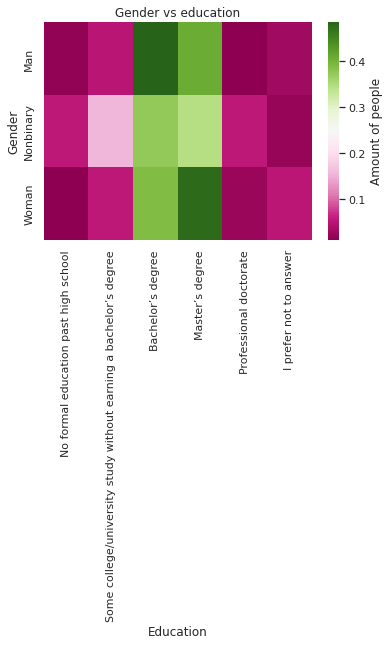

In [320]:
sns.set()
fig, ax = plt.subplots(figsize=(6,4)) 
ax = sns.heatmap(edu_gender_df, cmap="PiYG", cbar_kws={'label': 'Amount of people'})
plt.title("Gender vs education")
plt.show()

Each level of education has quite a different story. 

* Non-binary folks have the highest percentage of respondents with no formal education past high school, those with some college study without earning a degree, and those with professional doctorates. They have a myriad of education levels ranging from the lowest to the highest.
* Women have the highest percentage of respondents with master's degrees.
* Men have the highest percentage of respondents with bachelor's degrees.

These findings and looking at the visuals do not lead me to believe that education level and gender are necessarily connected. Each gender has a relatively even spread of education levels.

### Question 8. Is there an ideal age to be a data scientist and make a high salary?

As an aspiring data scientist, I'm interested to know if there is a clear age group of data scientists that are making high salaries. I know that some professions lend themselves to being younger or older so I'm curious to know where data scientists sit within that spectrum. 

#### EDA

In [321]:
data_scientists_df = merged_df.loc[merged_df['Role'].isin(["Data Scientist"])]
data_scientists_df

ds_age_salary_df = categorical_to_numeric("Age", "Salary")
ds_age_salary_df = ds_age_salary_df.reindex(index = ['$0-999', '1,000-1,999', '2,000-2,999','3,000-3,999', '4,000-4,999', '5,000-7,499', '7,500-9,999',
                                    '10,000-14,999', '15,000-19,999', '20,000-24,999','25,000-29,999',
                                    '30,000-39,999','40,000-49,999', '50,000-59,999', '60,000-69,999', 
                                 '70,000-79,999', '80,000-89,999', '90,000-99,999',
                                 '100,000-124,999', '125,000-149,999', '150,000-199,999',
                                 '200,000-249,999', '250,000-299,999', '300,000-499,999', '$500,000-999,999','>$1,000,000'])

ds_age_salary_df

Age,18-21,22-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-69,70+
Salary,,,,,,,,,,,
$0-999,650.0,1146.0,1061.0,562.0,409.0,267.0,165.0,118.0,80.0,106.0,36.0
"1,000-1,999",79.0,218.0,366.0,264.0,190.0,129.0,67.0,39.0,17.0,21.0,2.0
"2,000-2,999",28.0,111.0,223.0,150.0,116.0,80.0,61.0,38.0,13.0,16.0,2.0
"3,000-3,999",34.0,100.0,153.0,116.0,91.0,54.0,26.0,17.0,10.0,12.0,1.0
"4,000-4,999",27.0,210.0,177.0,105.0,70.0,49.0,37.0,22.0,15.0,11.0,2.0
"5,000-7,499",35.0,327.0,346.0,181.0,96.0,70.0,53.0,31.0,18.0,19.0,6.0
"7,500-9,999",25.0,183.0,268.0,154.0,91.0,76.0,47.0,41.0,16.0,13.0,3.0
"10,000-14,999",38.0,235.0,364.0,257.0,185.0,146.0,90.0,60.0,37.0,20.0,4.0
"15,000-19,999",14.0,94.0,209.0,170.0,142.0,85.0,49.0,47.0,23.0,20.0,5.0


I'm personally interested in making above \\$80,000, so we'll consider the salary ranges greater than this amount.

In [322]:
ds_age_salary_df = ds_age_salary_df[16:] 
ds_age_salary_df

Age,18-21,22-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-69,70+
Salary,,,,,,,,,,,
"80,000-89,999",1.0,19.0,79.0,126.0,109.0,88.0,57.0,60.0,41.0,28.0,2.0
"90,000-99,999",5.0,19.0,58.0,92.0,87.0,78.0,68.0,52.0,32.0,37.0,8.0
"100,000-124,999",7.0,24.0,93.0,189.0,178.0,195.0,143.0,104.0,84.0,82.0,11.0
"125,000-149,999",4.0,11.0,60.0,108.0,95.0,85.0,92.0,78.0,43.0,47.0,10.0
"150,000-199,999",1.0,9.0,54.0,96.0,136.0,108.0,94.0,77.0,54.0,64.0,12.0
"200,000-249,999",3.0,3.0,14.0,43.0,57.0,37.0,49.0,53.0,27.0,28.0,10.0
"250,000-299,999",3.0,1.0,11.0,18.0,30.0,24.0,12.0,21.0,14.0,15.0,2.0
"300,000-499,999",4.0,5.0,10.0,16.0,28.0,22.0,25.0,22.0,12.0,15.0,3.0
"$500,000-999,999",2.0,2.0,7.0,12.0,13.0,11.0,9.0,13.0,8.0,1.0,0.0


Let's look at the total number of respondents for each salary range.

In [323]:
ds_age_salary_df.sum(axis=1)

Salary
80,000-89,999        610.0
90,000-99,999        536.0
100,000-124,999     1110.0
125,000-149,999      633.0
150,000-199,999      705.0
200,000-249,999      324.0
250,000-299,999      151.0
300,000-499,999      162.0
$500,000-999,999      78.0
>$1,000,000           81.0
dtype: float64

#### Analysis

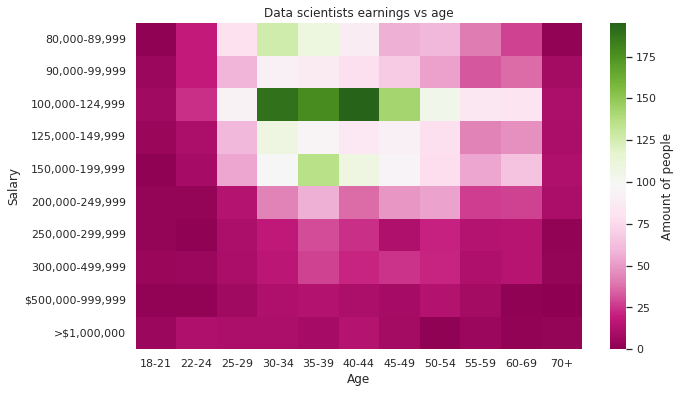

In [324]:
sns.set()
fig, ax = plt.subplots(figsize=(10,6)) 
ax = sns.heatmap(ds_age_salary_df, cmap="PiYG", cbar_kws={'label': 'Amount of people'})
plt.title("Data scientists earnings vs age")
plt.show()

It looks like 40 - 44 year olds are the most likely to be making the highest salary range in this survey with a salary of more than \\$1,000,000.

The next salary range of \\$500,000 - \\$999,000 is most common for 35 - 39 and 50 - 54 year olds.

The third highest salary range of \\$300,000 - \\$499,999 is most common for 35 - 39 year olds.

So overall for the highest ranges of salary, it seems like the ideal age of a data scientist is between 35 - 54 years old.

The intersection of a salary of \\$100,000 - \\$124,999 and an age range of 40 - 44 has the largest amount of respondents. This means that most of the data scientists surveyed fall into this category. Interestingly this salary range is the most prevalent across all the age groups with a total of 1110 respondents. This leads me to believe that this is one of the most common salary offerings for data scientists.

## Summary and inferences

This EDA project has lead to many conclusions and inferences about being in the tech industry. I'll highlight some of the analysis that was made throughout the project:

* Data scientists are made up of an even spread of genders.
* The United Arab Emirates appears in the list of top salary earning countries, as well as the lowest salary earning countries.
* Data scientists have the most lucrative jobs.
* Men make up a higher percentage of every salary range from \\$9,999 onwards.
* People with PHDs are mostly in the field of Academics/Education.
* Higher education leads to a higher salary only up to a certain threshold of money.
* Each gender has a relatively similar level of education.
* It seems like the ideal age of a data scientist in terms of making a high salary is between 35 - 54 years old.

## Future work and references

### Future work

In the future, I would love to expand upon the work that I've done in this project. I can envision a few paths forward that would lead to interesting analysis:

1. Incorporating Kaggle surveys from the past, keeping the year of submission in mind, in order to understand the changes that have occurred. I would specifically be interested in the roles and salaries of women and if those have changed for the better over time or not.
2. Investigating surveys outside of the tech world to gain a more well-rounded perspective on gender equality in the workplace.
3. Investigate the experiences of non-binary folks in more depth. From the two surveys that I have looked at in this project, only 165 respondents are non-binary. It would be useful to have more data from non-binary folks to understand their experiences in the work place with regards to salary and job roles. 
4. Using my findings and analysis in this project in order to provoke change. I am a huge advocate of equal pay and closing the wage gap for women and would love to have my data analysis be a part of the path forward towards equality.
5. Investigate new types of data visualisations in order to display the data.

I will continue working in this space and I plan to submit a similar project during the next Women in Data Dathathon. 

### References

* [2021 Kaggle Machine Learning & Data Science Survey](https://www.kaggle.com/competitions/kaggle-survey-2021/data)
* [2022 Kaggle Machine Learning & Data Science Survey](https://www.kaggle.com/competitions/kaggle-survey-2022/data)
* [Average salaries in India](https://www.jobted.in/salary#:~:text=Average%20Salary%20in%20India%20(2022)&text=The%20average%20salary%20in%20India,or%20%E2%82%B932%2C840%20per%20month)